## Kickstarter Data Analysis

This is my project work for Module 2. Plots, numbers and tables for the poster are produced with this Notebook. In this project, I will analyze data from the crowdfunding platform Kickstarter. My goal is to determine what the factors for success are, which projects make the most in pledged money, and which are most popular. I will not be able to comment on financial success as these numbers are not available.

## Data Preparation

The first step in the project will be to analyse the raw data and then make it fit our needs.

In [1]:
# Import the usual suspects
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from scipy.optimize import curve_fit

In [2]:
## GENERAL OPTIONS AND GLOBAL VARIABLES

# Since we will be dealing with a large dataset, floats are generally displayed as whole numbers to increase readability
# This will mainly be of use when we use the .describe() function
# The only feature that suffers in this is the SuccessQ column which is not as telling, as values > 0.5 are displayed as 1
pd.options.display.float_format = '{:.0f}'.format

# By default 30x2 entries of a dataframe are displayed. But for our purposes and to keep the outputs smaller, 10x2 should suffice
pd.set_option('display.max_rows',20)

# These are the colors we will use in our graphs to color-code the subset we will define and use
# So colors[0] = successful, colors[1] = failed, colors[2] = canceled, and colors[3] = working set
colors = ['lime', 'darkorange', 'royalblue', 'darkgrey']

In [3]:
## IMPORT DATA

# Import the CSV file. ID is imported as a string
ks_raw = pd.read_csv('KS-projects-201801.csv', dtype = {'ID' : str})

# Rename the columns
ks = ks_raw.rename(columns={'name' : 'Name',
                            'category' : 'Sub Category',
                            'main_category' : 'Main Category',
                            'currency' : 'Currency', 
                            'deadline' : 'Deadline',
                            'goal' : 'Goal',
                            'launched' : 'Launched',
                            'pledged' : 'Pledged',
                            'state' : 'State',
                            'backers' : 'Backers',
                            'country' : 'Country',
                            'usd pledged' : 'USD Pledged',
                            'usd_pledged_real' : 'USD Pledged Real',
                            'usd_goal_real' : 'USD Goal Real'})

In [4]:
# This is the description of all the columns as given by the data provider. We make a dataframe so we can easily call and modify it.

ks_column_description = pd.DataFrame(['Internal Kickstarter ID',
                                      'Name of project',
                                      'Sub category',
                                      'Main category',
                                      'Currency used to support',
                                      'Deadline for project',
                                      'Fundraising goal',
                                      'Date launched',
                                      'Pledged by crowd (in Currency)',
                                      'Current condition of project',
                                      'Number of backers',
                                      'Country where project was started',
                                      'Pledged by crowd (in USD)',
                                      'Pledged by crowd (in USD, real)',
                                      'Goal (in USD, real)'],
                                     index=['ID','Name','Sub Category','Main Category','Currency','Deadline','Goal',
                                            'Launched','Pledged','State','Backers','Country','USD Pledged',
                                            'USD Pledged Real','USD Goal Real'],
                                     columns=['Description'])

display(ks_column_description)

,Description
ID,Internal Kickstarter ID
Name,Name of project
Sub Category,Sub category
Main Category,Main category
Currency,Currency used to support
Deadline,Deadline for project
Goal,Fundraising goal
Launched,Date launched
Pledged,Pledged by crowd (in Currency)
State,Current condition of project


In [5]:
# BASIC DESCRIPTION

# This first gives a description of all numeric columns, but skips columns of other types
# This second gives a description of all object-type columns, e.g. strings
display(ks.describe())
display(ks.describe(include = [object]))

# Remark: You could also use the following, but the output contains many NaN fields and isn't very human-friendly to read
#display(ks.describe(include = 'all'))

# Five random lines
display(ks.sample(5))

,Goal,Pledged,Backers,USD Pledged,USD Pledged Real,USD Goal Real
count,378661,378661,378661,374864,378661,378661
mean,49081,9683,106,7037,9059,45454
std,1183391,95636,907,78640,90973,1152950
min,0,0,0,0,0,0
25%,2000,30,2,17,31,2000
50%,5200,620,12,395,624,5500
75%,16000,4076,56,3034,4050,15500
max,100000000,20338986,219382,20338986,20338986,166361391


,ID,Name,Sub Category,Main Category,Currency,Deadline,Launched,State,Country
count,378661,378657,378661,378661,378661,378661,378661,378661,378661
unique,378661,375764,159,15,14,3164,378089,6,23
top,74559835,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,1,41,22314,63585,295365,705,7,197719,292627


,ID,Name,Sub Category,Main Category,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country,USD Pledged,USD Pledged Real,USD Goal Real
96050,1488295290,Go Notes,Web,Technology,CAD,2015-11-16,5000,2015-10-07 19:03:21,0,failed,0,CA,0,0,3756
88444,1449667710,Temporary Miracles (Canceled),Indie Rock,Music,USD,2012-12-26,5000,2012-11-26 17:46:45,970,canceled,16,US,970,970,5000
186299,1948295247,Garden Trains of Austin,Public Art,Art,USD,2014-09-12,1500,2014-07-29 03:42:52,30,failed,2,US,30,30,1500
256578,374803524,BENEATH - Publish the book • Visit another wor...,Fiction,Publishing,USD,2010-09-24,5500,2010-08-10 21:54:47,1000,canceled,26,US,1000,1000,5500
274829,46845061,swagfriends.com site and app,Technology,Technology,USD,2015-06-11,50000,2015-05-12 03:04:43,0,failed,0,US,0,0,50000


Here, we get a few important key figures about our data set.

There are 378'661 unique IDs (= projects), 15 main categories, 159 sub categories, 23 different countries, and 14 different currencies.

We can also already see that most of the columns do not have missing values, so we can assume that the data is of serviceable quality.

In [6]:
ks['Launched'].sort_values()

75397     1970-01-01 01:00:00
319002    1970-01-01 01:00:00
2842      1970-01-01 01:00:00
94579     1970-01-01 01:00:00
247913    1970-01-01 01:00:00
273779    1970-01-01 01:00:00
48147     1970-01-01 01:00:00
169268    2009-04-21 21:02:48
322000    2009-04-23 00:07:53
138572    2009-04-24 21:52:03
                 ...         
125582    2018-01-02 12:45:34
236590    2018-01-02 13:02:29
340295    2018-01-02 13:11:02
275919    2018-01-02 14:04:11
100061    2018-01-02 14:07:02
95778     2018-01-02 14:13:09
373787    2018-01-02 14:15:38
217150    2018-01-02 14:17:46
163161    2018-01-02 14:38:17
66683     2018-01-02 15:02:31
Name: Launched, Length: 378661, dtype: object

In [7]:
# Get a list and a count of the project states
ks['State'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: State, dtype: int64

In [8]:
# Get a list and a count of the main categories
ks['Main Category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: Main Category, dtype: int64

In [37]:
# Get a list and a count of the sub categories
# If you want to see all the sub categories, set displayAll to 'Y'

displayAll = 'N'

if displayAll == 'Y':
    pd.set_option('display.max_rows', 200)
    display(ks['Sub Category'].value_counts())
    pd.set_option('display.max_rows', 20)
else:
    display(ks['Sub Category'].value_counts())

Product Design        22314
Documentary           16139
Music                 15727
Tabletop Games        14180
Shorts                12357
Video Games           11830
Food                  11493
Film & Video          10108
Fiction                9169
Fashion                8554
Nonfiction             8318
Art                    8253
Apparel                7166
Theater                7057
Technology             6930
Rock                   6758
Children's Books       6756
Apps                   6345
Publishing             6018
Webseries              5762
Photography            5752
Indie Rock             5657
Narrative Film         5188
Web                    5153
Comics                 4996
Crafts                 4664
Country & Folk         4451
Design                 4199
Hip-Hop                3912
Hardware               3663
Pop                    3350
Painting               3294
Games                  3226
Illustration           3175
Accessories            3165
Public Art          

We want to focus on projects in the states successful, failed, and canceled. We drop live, suspended, and undefined projects.

**Successful** projects are those who managed to reach the funding goal.

**Failed** projects did not meet the funding goal in the required time.

**Canceled** projects are ones that were canceled by the project initiators for one reason or another. They can be viewed as a subset of Failed.

**Live** projects are dropped for now because they are in a not-yet finished state. However, these may be used later to test our findings.

**Suspended** projects are dropped because they have been terminated by Kickstarter due to one reason or another.

**Undefined** projects are dropped because they would have to be manually categorized first and while they make up less than 1% of projects, there's over 3'500 of them.

We re-arrange the dataframe to our needs and only display relevant columns. For easier access and further analysis, we create individual dataframes for all states as well as a working set containing successful, failed, and canceled projects.



In [10]:
## RE-ARRANGE DATAFRAME

# To simplyfy, we drop the countries and local currencies and focus on the converted values into US dollars for fundraising goal (USD Goal Real)
# and pledged amount (USD Pledged Real) and re-name them to simply "Goal" and "Pledged"
ks_re = pd.DataFrame(ks, columns=['ID', 'Name', 'Main Category', 'Sub Category', 'State', 'USD Goal Real', 'USD Pledged Real', 'Backers'])
ks_re = ks_re.rename(columns={'USD Goal Real' : 'Goal', 'USD Pledged Real' : 'Pledged'})

# We also add a new column 'SuccessQ' (Success Quotient) which denotes the quotient of pledged amount and funding goal
# And a new column 'PerBacker' (Pledged Amount per Backer) which denotes the quotient of pledged amount and backers
# We use the .where() method to circumvent division by 0
ks_re['SuccessQ'] = np.where(ks_re['Goal'] == 0, 0, ks_re['Pledged'] / ks_re['Goal'])
ks_re['PerBacker'] = np.where(ks_re['Backers'] == 0, 0, ks_re['Pledged'] / ks_re['Backers'])

# If you want to see ks_re, set display_ks_re to 'Y'
display_ks_re = 'N'

if display_ks_re == 'Y':
    pd.options.display.float_format = '{:.2f}'.format
    display(ks_re)
    pd.options.display.float_format = '{:.0f}'.format

In [11]:
# Individual sets
ks_succ = ks_re.loc[ks_re['State']=='successful']
ks_fail = ks_re.loc[ks_re['State']=='failed']
ks_canc = ks_re.loc[ks_re['State']=='canceled']
ks_live = ks_re.loc[ks_re['State']=='live']
ks_susp = ks_re.loc[ks_re['State']=='suspended']
ks_udef = ks_re.loc[ks_re['State']=='undefined']

# Working set
ks_ws = pd.DataFrame()
ks_ws = ks_ws.append(ks_succ).append(ks_fail).append(ks_canc)

This concludes the data preparation step. Getting the data in a format you can actually work with is not always an easy undertaking. Luckily, the data we have is complete and there are no missing values, so we don't have to make the tough calls on how to handle these cases.

## Data Description and Visualization

In this step, we will visualize the data. We start with the working set with respect to funding goal, pledged amount, and backers. For the graphs, the range had to be adjusted to be able to show some structure in the data as there were overwhelming outliers.

Example: The 25% percentile for the backers is 2 while the max is 219,382. There over 100,000 projects with 0, 1, or 2 backers on 0.001% of the range. Without excluding some data points, the plot would not show much detail.

In [12]:
# Backers value counts
ks_ws['Backers'].value_counts().head(10)

0    50882
1    34280
2    22866
3    15855
4    11887
5     9599
6     8059
7     6932
8     6113
9     5473
Name: Backers, dtype: int64

Some sample lines:



,ID,Name,Main Category,Sub Category,State,Goal,Pledged,Backers,SuccessQ,PerBacker
27132,1137928493,UNAUTHORIZED! The Story of the Fighting Sioux,Film & Video,Documentary,successful,50000,51816,290,1,179
239899,290080335,TOY FOAM Blaster Blades for Larping and Cosplay!,Design,Product Design,failed,2000,65,4,0,16
267855,43286712,"The Sea Horse, presented by Different Stages",Theater,Plays,failed,1000,0,0,0,0
258856,386521785,The Art Of Big 'O',Publishing,Art Books,failed,24000,8019,77,0,104
155928,1793085382,Faith & Able - Because with Faith you are alwa...,Publishing,Children's Books,failed,10000,50,1,0,50
369700,953508950,Commissions: Co-create New Music with Thread E...,Music,Music,successful,5500,5601,112,1,50
195822,1997215692,PC GAMING 2015 (Canceled),Games,Gaming Hardware,canceled,1633,0,0,0,0


Basic description:



,Goal,Pledged,Backers,SuccessQ,PerBacker
count,370454,370454,370454,370454,370454
mean,45076,9148,107,3,65
std,1128265,91664,915,270,137
min,0,0,0,0,0
25%,2000,32,2,0,14
50%,5500,633,12,0,41
75%,15960,4076,57,1,76
95%,80000,28406,338,3,200
max,166361391,20338986,219382,104278,10000


Our working set contains 370,454 data sets, which is 97.8% of all projects.

The plot shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.



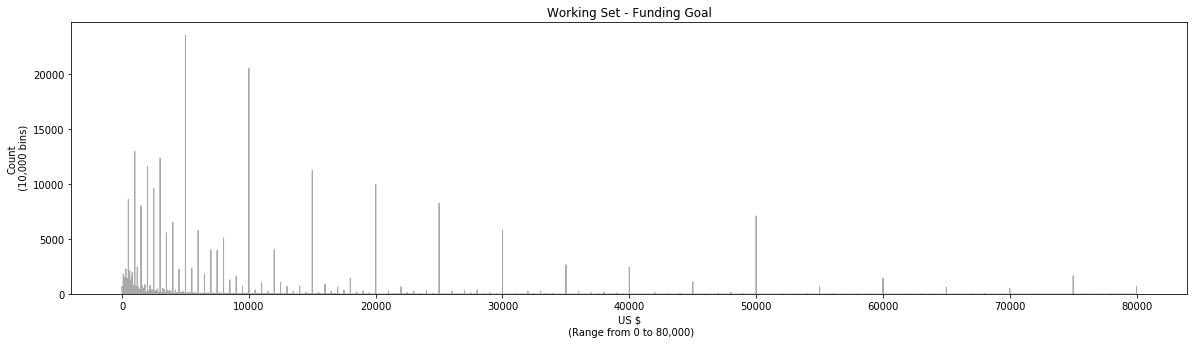

While this data looks more random at first glance, one can spot the small peaks at the 5k lines which correspond to the funding goals in the above graph.
In a Kickstarter campaign, backers often pledge more money or recruit additional backers if a project is close to reaching its goal.



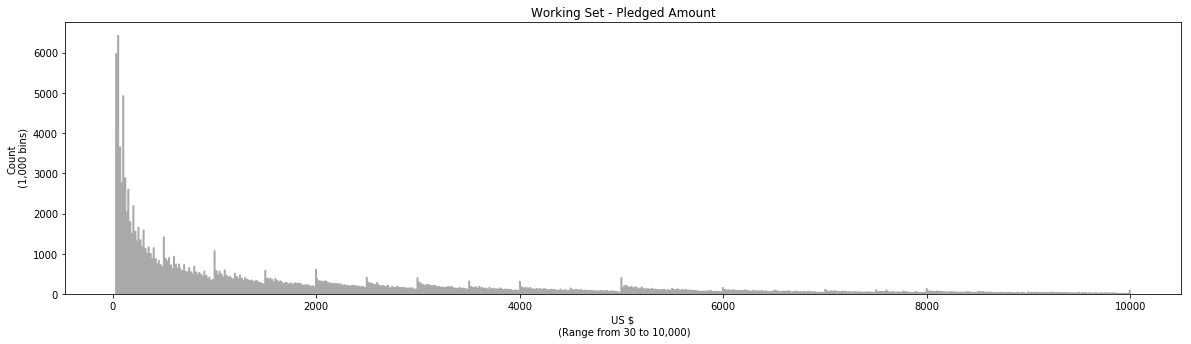

The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.



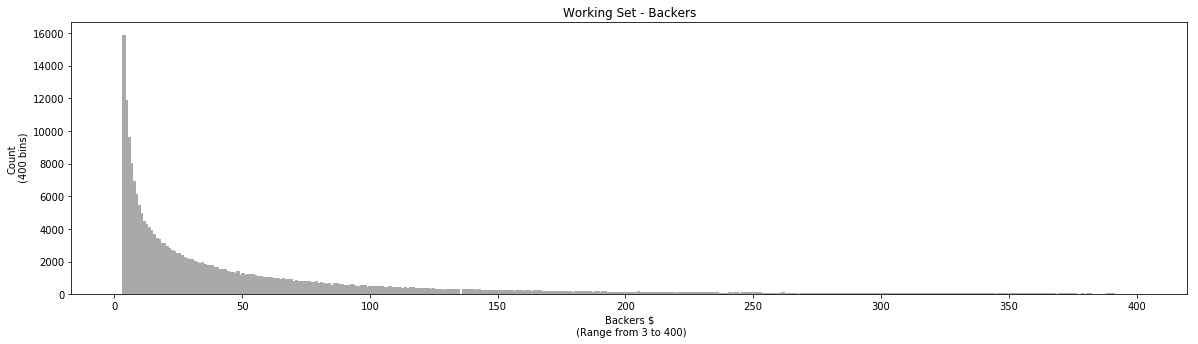

This is a very interesting graph. It shows that for the overwhelming majority of projects, they are either not successful at all, or people get together and make them come to life.



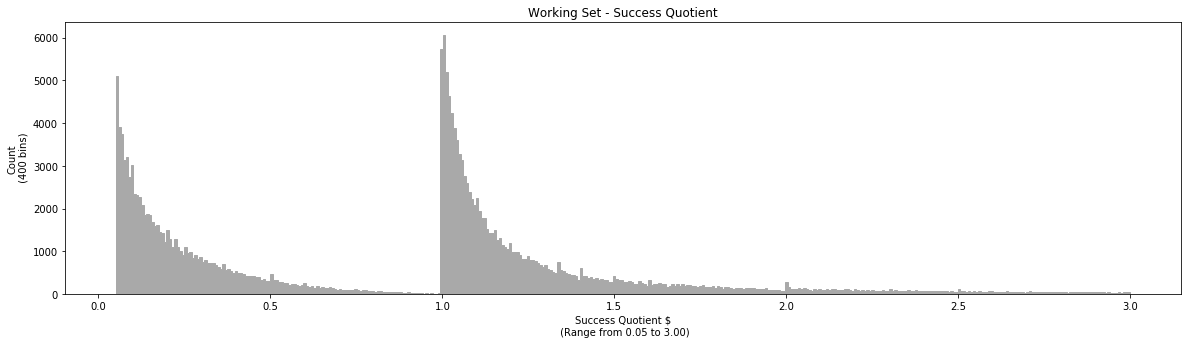

$1 is the minimal amount at which someone can back a campaign. Obviously, this does not really help the campaign, but it can show support.
Also, backing at any level means you get the update emails and can see how a campaign fares, with the possibility of increasing your pledge if needed.
We can see clear isolated peaks again, which is not something we would necessarily expect since the whole pledged amount is divided by the number of backers.
This is likely because many campaigns only offer one backer level.



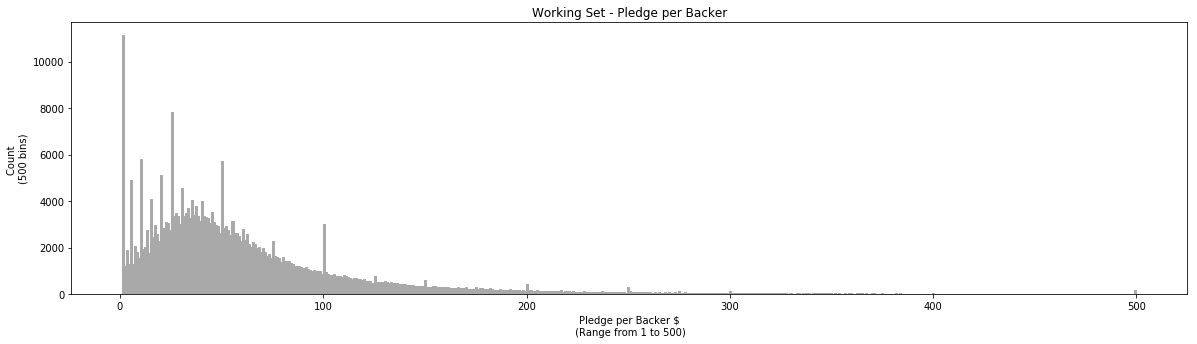

In [13]:
## WORKING SET

print("Some sample lines:\n")
display(ks_ws.sample(7))

print("Basic description:\n")
display(ks_ws.describe(percentiles = [0.25, 0.75, 0.95]))

# Regarding formatting: {:,d} specifies that the variable is an integer with a comma as a thousand separator, so 1234 is displayed as 1,234
#                       This could also be shortened to {:,} if you're sure that the number is an integer
# The .shape[0] method is a very fast way to get a count on a dataframe
print("Our working set contains {:,d} data sets, which is {:,.1f}% of all projects.\n".format(ks_ws.shape[0], 100*ks_ws.shape[0]/ks.shape[0]))

# GOAL

plt.figure(figsize=(20,5))
range1 = 0
range2 = 80000
bins_  = 10000

print("The plot shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.\n")

ks_ws_goal_plt = ks_ws['Goal'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[3], fill=True, histtype='step')
ks_ws_goal_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_goal_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_goal_plt.set_title('Working Set - Funding Goal')
plt.show()

# PLEDGED

plt.figure(figsize=(20,5))
range1 = 30
range2 = 10000
bins_  = 1000

print("While this data looks more random at first glance, one can spot the small peaks at the 5k lines which correspond to the funding goals in the above graph.\n" +
      "In a Kickstarter campaign, backers often pledge more money or recruit additional backers if a project is close to reaching its goal.\n")

ks_ws_pledged_plt = ks_ws['Pledged'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[3], fill=True, histtype='step')
ks_ws_pledged_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1,range2))
ks_ws_pledged_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_pledged_plt.set_title('Working Set - Pledged Amount')
plt.show()

# BACKERS

plt.figure(figsize=(20,5))
range1 = 3
range2 = 400
bins_  = 400

print("The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.\n")

ks_ws_backers_plt = ks_ws['Backers'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[3], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Backers $\n (Range from {:,d} to {:,d})'.format(range1,range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Working Set - Backers')
plt.show()

# SUCESS QUOTIENT

plt.figure(figsize=(20,5))
range1 = 0.05
range2 = 3
bins_  = 400

print("This is a very interesting graph. It shows that for the overwhelming majority of projects, they are either not successful at all, " +
      "or people get together and make them come to life.\n")

ks_ws_backers_plt = ks_ws['SuccessQ'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[3], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Success Quotient $\n (Range from {:,.2f} to {:,.2f})'.format(range1,range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Working Set - Success Quotient')
plt.show()

# PLEDGED PER BACKER

plt.figure(figsize=(20,5))
range1 = 1
range2 = 500
bins_  = 500

print("$1 is the minimal amount at which someone can back a campaign. Obviously, this does not really help the campaign, but it can show support.\n" +
      "Also, backing at any level means you get the update emails and can see how a campaign fares, with the possibility of increasing your pledge if needed.\n" +
      "We can see clear isolated peaks again, which is not something we would necessarily expect since the whole pledged amount is divided by the number of backers.\n" +
      "This is likely because many campaigns only offer one backer level.\n")

ks_ws_backers_plt = ks_ws['PerBacker'].plot(kind="hist", bins=bins_, range=(1,500), color=colors[3], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Pledge per Backer $\n (Range from {:,d} to {:,d})'.format(range1,range2))
ks_ws_backers_plt.set_ylabel('Count \n({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Working Set - Pledge per Backer')
plt.show()

Next, we will do the same analysis for the three subsets of our working set. First, the successful projects.

Some sample lines:



,ID,Name,Main Category,Sub Category,State,Goal,Pledged,Backers,SuccessQ,PerBacker
327501,737929441,Miniature Holders & Grips for painting and scu...,Games,Tabletop Games,successful,5570,253336,3638,45,70
121206,1615650044,Heiðrún 2.0,Crafts,DIY,successful,200,223,12,1,19
304042,618008379,New CD and European House Concert Tour!,Music,Music,successful,6000,6106,84,1,73
206432,2051784110,Grand Guignol: The Legendary Theater of Terror...,Art,Art,successful,400,5019,86,13,58
269357,440615510,AQUELARRE — the dark & mature medieval RPG *no...,Games,Tabletop Games,successful,20000,57694,738,3,78


Basic description:



,Goal,Pledged,Backers,SuccessQ,PerBacker
count,133956,133956,133956,133956,133956
mean,9533,22671,264,9,91
std,27961,151090,1505,445,126
min,0,1,0,1,0
25%,1302,2000,33,1,41
50%,3838,5107,71,1,63
75%,10000,13232,167,2,102
95%,35000,69670,885,6,236
max,2015609,20338986,219382,104278,10000


The plot, too, shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.



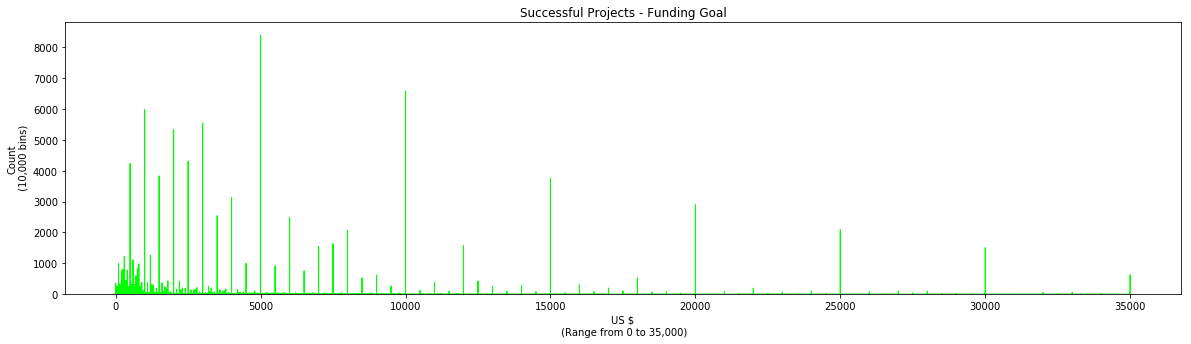

While this data looks more random at first glance, one can spot the small peaks at the 5k lines which correspond to the funding goals.
The peaks here are much more pronounced than the same graph in the working set.



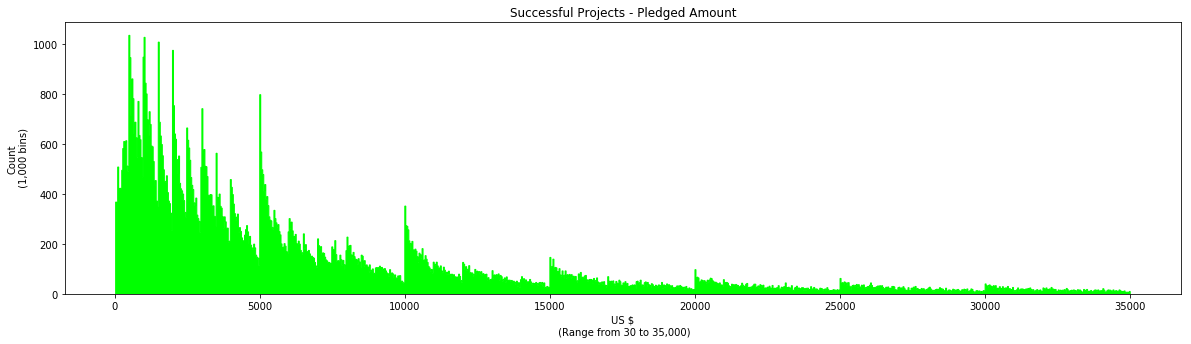

The backers curve very strongly resembles a Poisson distribution. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.



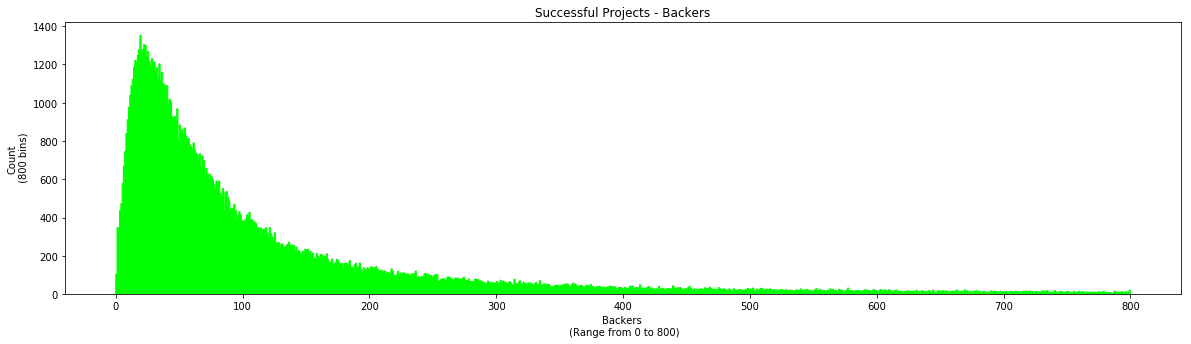

It's no surprise that we don't see any projects with a Success Quotient < 1 as this is so by definition. What is interesting is that the overwhelming
majority of projects just reaches the goal without going significantly over. Although this finding is countered somewhat by the fact that the mean is 9.
However, oddly, the median is only 1 and even the 95% percentile is only 6. When we look at the max, we might see where the problem lies: It's over 100,000.



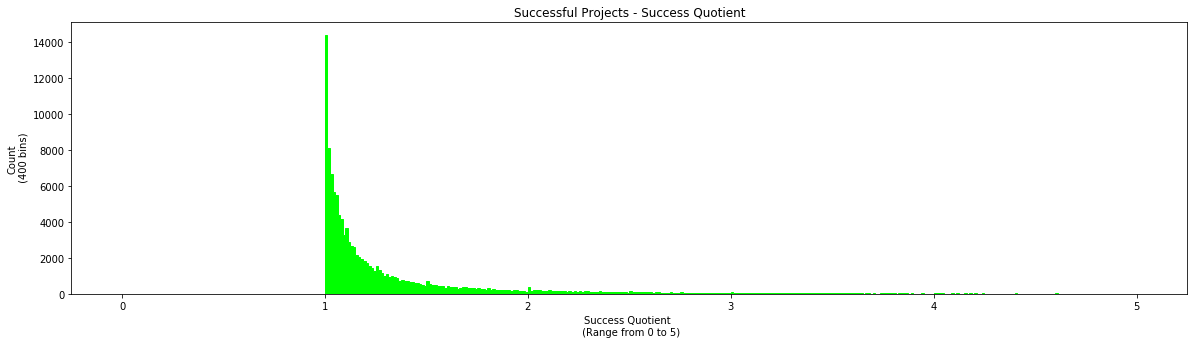

We can clearly see that the successful projects don't necessarily garner huge amounts per backer, but non-trivial amounts nontheless.
Of the total funding, 43.0% are $100 or less and 71.2% are $200 or less.



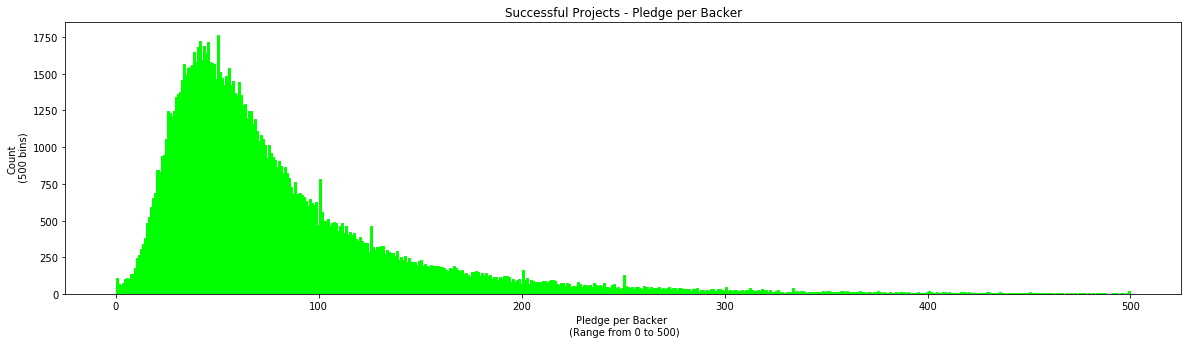

In [14]:
## SUCCESSFUL PROJECTS

print("Some sample lines:\n")
display(ks_succ.sample(5))

print("Basic description:\n")
display(ks_succ.describe(percentiles = [0.25, 0.75, 0.95]))

# GOAL

plt.figure(figsize=(20,5))
range1 = 0
range2 = 35000
bins_  = 10000

print("The plot, too, shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.\n")

ks_succ_goal_plt = ks_succ['Goal'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[0], fill=True, histtype='step')
ks_succ_goal_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_succ_goal_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_succ_goal_plt.set_title('Successful Projects - Funding Goal')
plt.show()

# PLEDGED

plt.figure(figsize=(20,5))
range1 = 30
range2 = 35000
bins_  = 1000

print("While this data looks more random at first glance, one can spot the small peaks at the 5k lines which correspond to the funding goals.\n" +
      "The peaks here are much more pronounced than the same graph in the working set.\n")

ks_succ_pledged_plt = ks_succ['Pledged'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[0], fill=True, histtype='step')
ks_succ_pledged_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_succ_pledged_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_succ_pledged_plt.set_title('Successful Projects - Pledged Amount')
plt.show()

# BACKERS

plt.figure(figsize=(20,5))
range1 = 0
range2 = 800
bins_  = 800

print("The backers curve very strongly resembles a Poisson distribution. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.\n")

ks_succ_backers_plt = ks_succ['Backers'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[0], fill=True, histtype='step')
ks_succ_backers_plt.set_xlabel('Backers \n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_succ_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_succ_backers_plt.set_title('Successful Projects - Backers')
plt.show()

# SUCCESS QUOTIENT

plt.figure(figsize=(20,5))
range1 = 0
range2 = 5
bins_  = 400

print("It's no surprise that we don't see any projects with a Success Quotient < 1 as this is so by definition. What is interesting is that the overwhelming\n" +
      "majority of projects just reaches the goal without going significantly over. Although this finding is countered somewhat by the fact that the mean is 9.\n" +
      "However, oddly, the median is only 1 and even the 95% percentile is only 6. When we look at the max, we might see where the problem lies: It's over 100,000.\n")

ks_ws_backers_plt = ks_succ['SuccessQ'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[0], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Success Quotient \n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Successful Projects - Success Quotient')
plt.show()

# PLEDGE PER BACKER

plt.figure(figsize=(20,5))
range1 = 0
range2 = 500
bins_  = 500

# "leq" stands for "less or equal"
# We sum up the values leq x using a trick. We set the values larger than that to 0 and then sum up the column
leq100 = 100 * np.where(ks_succ['PerBacker'] <= 100, ks_succ['PerBacker'], 0).sum() / ks_succ['PerBacker'].sum()
leq200 = 100 * np.where(ks_succ['PerBacker'] <= 200, ks_succ['PerBacker'], 0).sum() / ks_succ['PerBacker'].sum()

print("We can clearly see that the successful projects don't necessarily garner huge amounts per backer, but non-trivial amounts nontheless.\n" +
      "Of the total funding, {:.1f}% are $100 or less and {:.1f}% are $200 or less.\n".format(leq100, leq200))

ks_ws_backers_plt = ks_succ['PerBacker'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[0], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Pledge per Backer \n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Successful Projects - Pledge per Backer')
plt.show()

Next, the failed projects:

Some sample lines:



,ID,Name,Main Category,Sub Category,State,Goal,Pledged,Backers,SuccessQ,PerBacker
257659,380078213,100% Attitude,Photography,Photography,failed,3700,550,5,0,110
165856,1843834510,HAVE A HEART FOR GREEN? 'GREEN HEART' RECYCLED...,Art,Mixed Media,failed,5500,125,2,0,62
82614,1420017007,"Damon ""Chub"" Anderson and the Unsolved Mullend...",Publishing,Nonfiction,failed,45000,3925,31,0,127
344244,823350433,MendoLicious High Tea Cannabis Cookbook,Publishing,Nonfiction,failed,5000,1616,21,0,77
68509,1348660130,The Cobra Culture™ Winter 2014 Collection,Fashion,Fashion,failed,20000,695,6,0,116


Basic description:



,Goal,Pledged,Backers,SuccessQ,PerBacker
count,197719,197719,197719,197719,197719
mean,63175,1321,16,0,49
std,1435683,6820,71,0,133
min,0,0,0,0,0
25%,2500,3,1,0,2
50%,7500,100,3,0,25
75%,20000,663,12,0,55
95%,100000,5609,66,0,161
max,166361391,757353,6550,1,10000


This plot again shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.



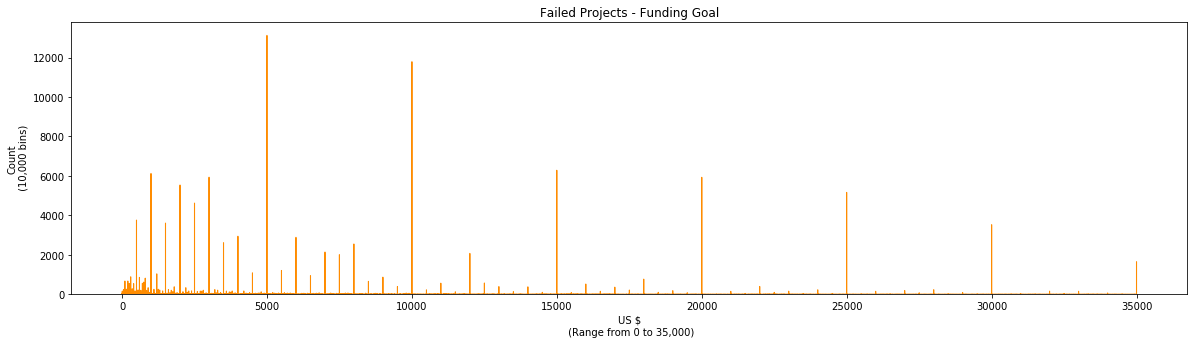

Here, we don't see the peaks at the 5k lines. This is because there was no last-ditch effort to push the project over the funding line.



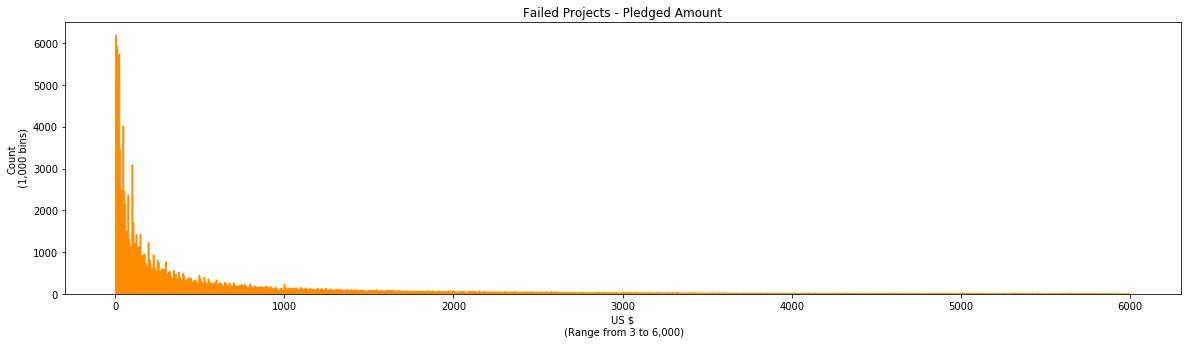

The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.



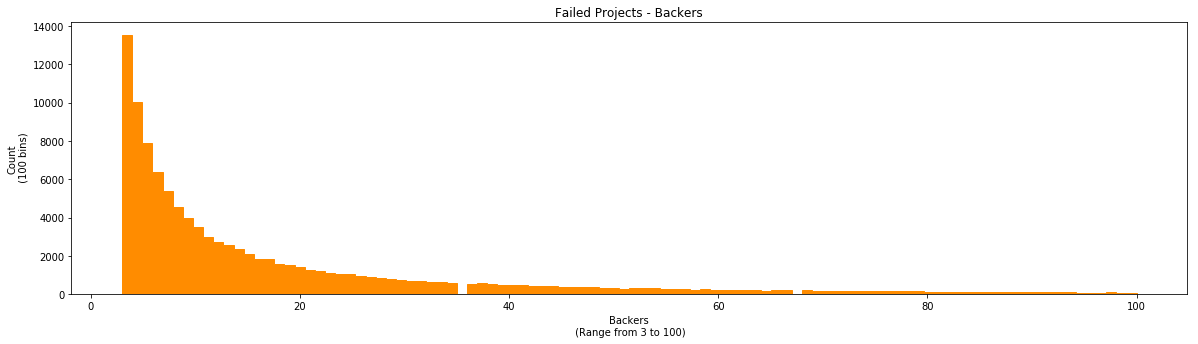

This graph clearly shows what we realized before: Failed projects are often total failures that have never really taken off in the first place.



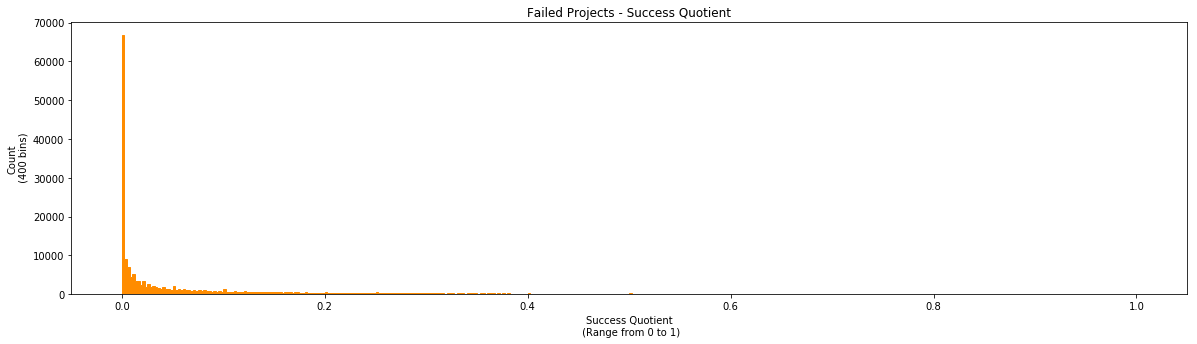

Surprisingly, even though the graph tells another story, the percentages of the failed projects are not much different from the successful ones.
Of the total funding, 48.7% are $100 or less and 68.5% are $200 or less.



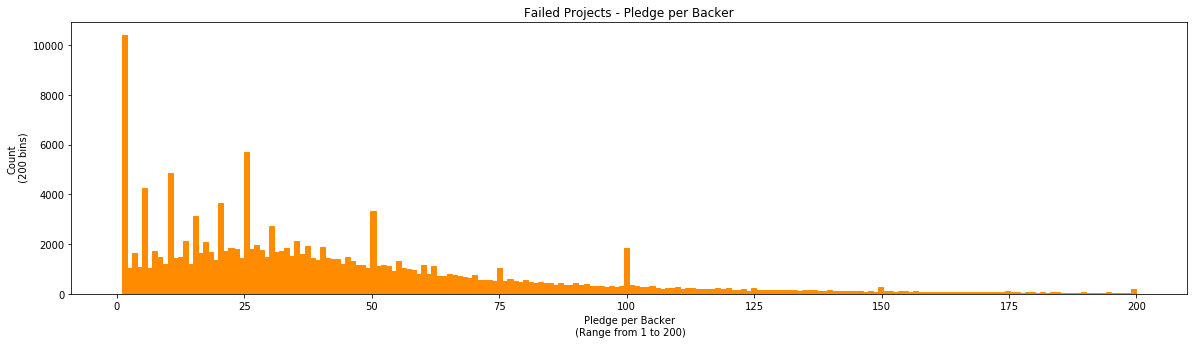

In [15]:
## FAILED PROJECTS

print("Some sample lines:\n")
display(ks_fail.sample(5))

print("Basic description:\n")
display(ks_fail.describe(percentiles = [0.25, 0.75, 0.95]))

# GOAL

plt.figure(figsize=(20,5))
range1 = 0
range2 = 35000
bins_  = 10000

print("This plot again shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.\n")

ks_fail_goal_plt = ks_fail['Goal'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[1], fill=True, histtype='step')
ks_fail_goal_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_fail_goal_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_fail_goal_plt.set_title('Failed Projects - Funding Goal')
plt.show()

# PLEDGED

plt.figure(figsize=(20,5))
range1 = 3
range2 = 6000
bins_  = 1000

print("Here, we don't see the peaks at the 5k lines. This is because there was no last-ditch effort to push the project over the funding line.\n")

ks_fail_pledged_plt = ks_fail['Pledged'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[1], fill=True, histtype='step')
ks_fail_pledged_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_fail_pledged_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_fail_pledged_plt.set_title('Failed Projects - Pledged Amount')
plt.show()

# BACKERS

plt.figure(figsize=(20,5))
range1 = 3
range2 = 100
bins_  = 100

print("The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.\n")

ks_fail_backers_plt = ks_fail['Backers'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[1], fill=True, histtype='step')
ks_fail_backers_plt.set_xlabel('Backers\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_fail_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_fail_backers_plt.set_title('Failed Projects - Backers')
plt.show()

# SUCCESS QUOTIENT
                               
plt.figure(figsize=(20,5))
range1 = 0
range2 = 1
bins_  = 400                               
                               
print("This graph clearly shows what we realized before: Failed projects are often total failures that have never really taken off in the first place.\n")

ks_ws_backers_plt = ks_fail['SuccessQ'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[1], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Failed Projects - Success Quotient')
plt.show()

# PLEDGED PER BACKER

plt.figure(figsize=(20,5))
range1 = 1
range2 = 200
bins_  = 200

# "leq" stands for "less or equal"
# We sum up the values leq x using a trick. We set the values larger than that to 0 and then sum up the column
leq100 = 100 * np.where(ks_fail['PerBacker'] <= 100, ks_fail['PerBacker'], 0).sum() / ks_fail['PerBacker'].sum()
leq200 = 100 * np.where(ks_fail['PerBacker'] <= 200, ks_fail['PerBacker'], 0).sum() / ks_fail['PerBacker'].sum()

print("Surprisingly, even though the graph tells another story, the percentages of the failed projects are not much different from the successful ones.\n" +
      "Of the total funding, {:.1f}% are $100 or less and {:.1f}% are $200 or less.\n".format(leq100, leq200))

ks_ws_backers_plt = ks_fail['PerBacker'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[1], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Pledge per Backer\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Failed Projects - Pledge per Backer')
plt.show()

Next, the canceled projects.

Some sample lines:



,ID,Name,Main Category,Sub Category,State,Goal,Pledged,Backers,SuccessQ,PerBacker
157432,1800870841,Charleston Photo Project (Canceled),Photography,Photobooks,canceled,5000,0,0,0,0
275163,47008533,"Introducing Nubrella, the world's first hands-...",Design,Product Design,canceled,95000,25856,77,0,336
357997,893689339,Wim3rl - Watercooled Printerhead for Delta 3D ...,Technology,3D Printing,canceled,2702,1104,8,0,138
63224,1321564530,Get QRunk (Canceled),Games,Tabletop Games,canceled,15000,23,2,0,12
12214,106121735,Amaranthine Story Chapter I (Canceled),Games,Video Games,canceled,9000,821,33,0,25


Basic description:



,Goal,Pledged,Backers,SuccessQ,PerBacker
count,38779,38779,38779,38779,38779
mean,75579,2341,26,1,57
std,1281389,13524,136,111,176
min,0,0,0,0,0
25%,3290,0,0,0,0
50%,10000,87,3,0,25
75%,30000,907,15,0,59
95%,150000,10115,108,1,201
max,100000000,1076751,9326,16971,10000


Also with the canceled projects, the plot shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.



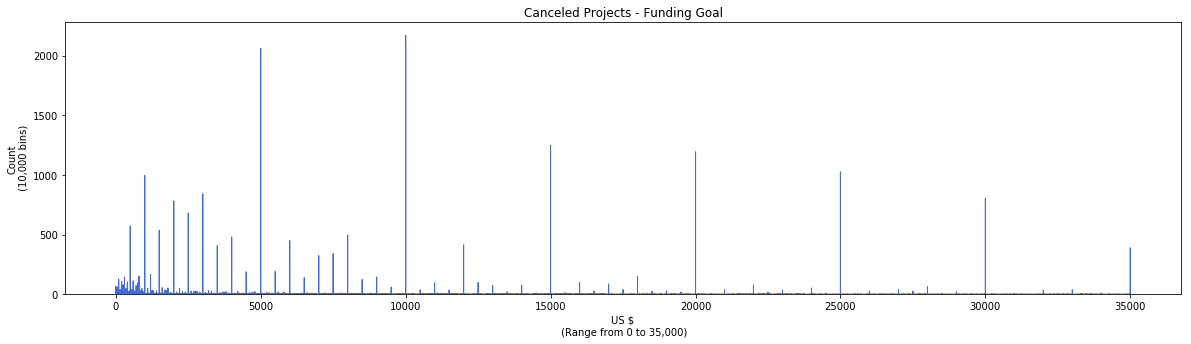

Here, we don't see the peaks at the 5k lines. This is because there was no last-ditch effort to push the project over the funding line as
the campagnes were prematurely terminated.



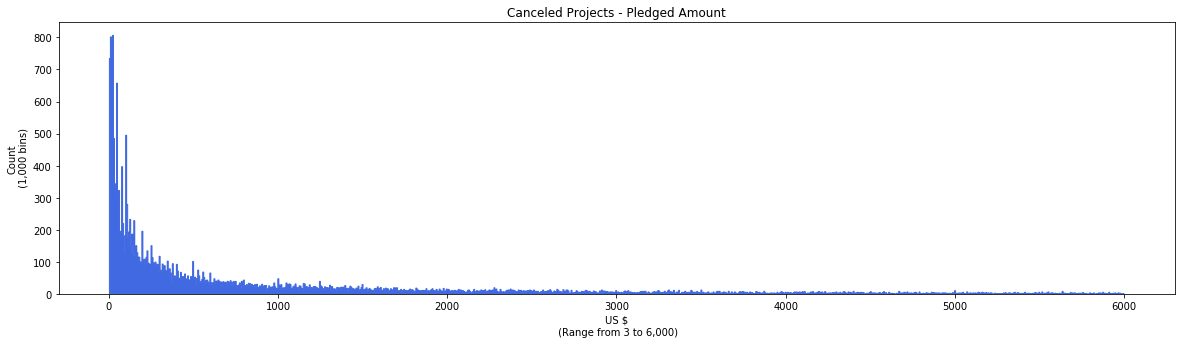

The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.



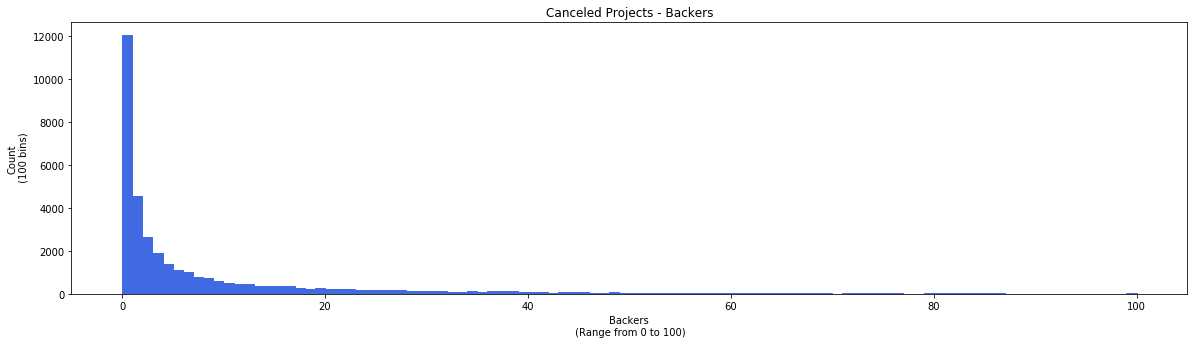

It's not surprising that this graph closely resembles that of the failed projects. However, there are some interesting outliers which will
be more apparent in the scatter plots.



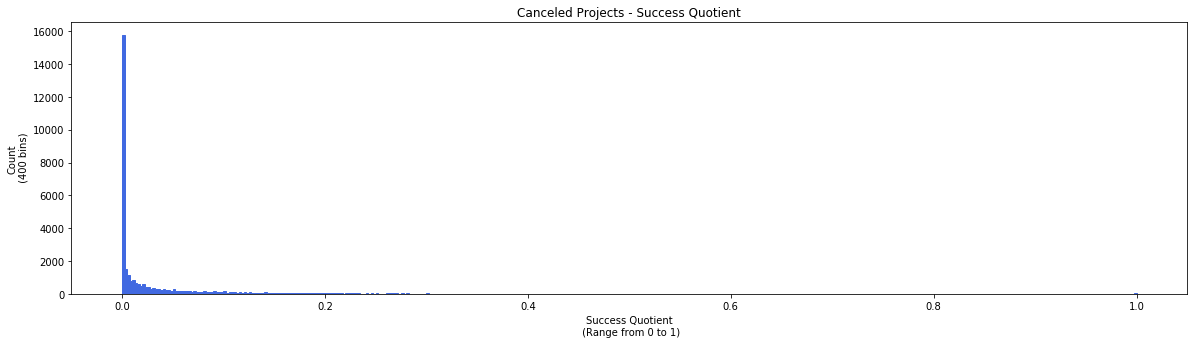

Here, we can see a difference, if not in the shape of the graph, then in the numbers. Canceled projects are odd birds in that they not rarely exceeded
their funding goals by large amounts before being canceled. Of the total funding, 38.2% are $100 or less and 57.3% are $200 or less.



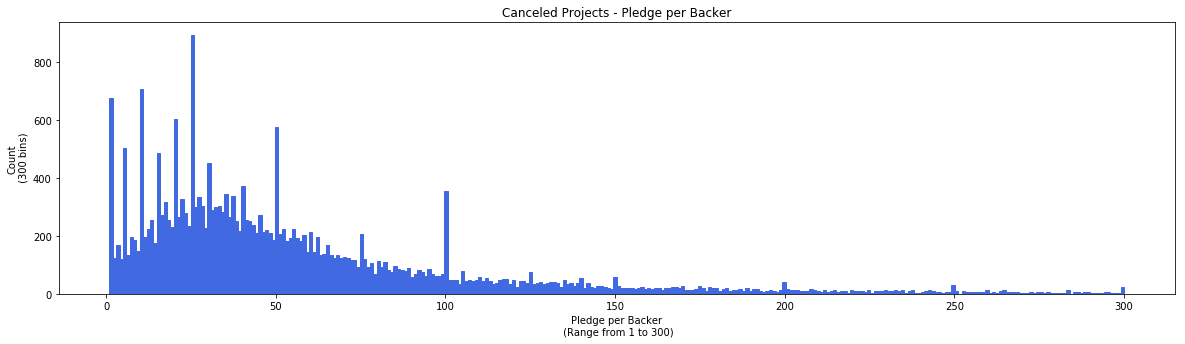

In [16]:
## CANCELED PROJECTS

print("Some sample lines:\n")
display(ks_canc.sample(5))

print("Basic description:\n")
display(ks_canc.describe(percentiles = [0.25, 0.75, 0.95]))

# GOAL

plt.figure(figsize=(20,5))
range1 = 0
range2 = 35000
bins_  = 10000

print("Also with the canceled projects, the plot shows that the funding goals were deliberately picked by humans as there are clearly visible and isolated peaks at the 5k lines.\n")

ks_canc_goal_plt = ks_canc['Goal'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[2], fill=True, histtype='step')
ks_canc_goal_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_canc_goal_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_canc_goal_plt.set_title('Canceled Projects - Funding Goal')
plt.show()

# PLEDGED

plt.figure(figsize=(20,5))
range1 = 3
range2 = 6000
bins_  = 1000

print("Here, we don't see the peaks at the 5k lines. This is because there was no last-ditch effort to push the project over the funding line as\n" +
      "the campagnes were prematurely terminated.\n")

ks_canc_pledged_plt = ks_canc['Pledged'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[2], fill=True, histtype='step')
ks_canc_pledged_plt.set_xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_canc_pledged_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_canc_pledged_plt.set_title('Canceled Projects - Pledged Amount')
plt.show()

# BACKERS

plt.figure(figsize=(20,5))
range1 = 0
range2 = 100
bins_  = 100

print("The backers curve very strongly resembles a hyperbola. As the incentive in Kickstarter is funds and not people, we don't see the peaks of the previous graphs.\n")

ks_canc_backers_plt = ks_canc['Backers'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[2], fill=True, histtype='step')
ks_canc_backers_plt.set_xlabel('Backers\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_canc_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_canc_backers_plt.set_title('Canceled Projects - Backers')
plt.show()

# SUCCESS QUOTIENT

plt.figure(figsize=(20,5))
range1 = 0
range2 = 1
bins_  = 400

print("It's not surprising that this graph closely resembles that of the failed projects. However, there are some interesting outliers which will\n" +
      "be more apparent in the scatter plots.\n")

ks_ws_backers_plt = ks_canc['SuccessQ'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[2], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Canceled Projects - Success Quotient')
plt.show()

# PLEDGED PER BACKER

plt.figure(figsize=(20,5))
range1 = 1
range2 = 300
bins_  = 300

# "leq" stands for "less or equal"
# We sum up the values leq x using a trick. We set the values larger than that to 0 and then sum up the column
leq100 = 100 * np.where(ks_canc['PerBacker'] <= 100, ks_canc['PerBacker'], 0).sum() / ks_canc['PerBacker'].sum()
leq200 = 100 * np.where(ks_canc['PerBacker'] <= 200, ks_canc['PerBacker'], 0).sum() / ks_canc['PerBacker'].sum()

print("Here, we can see a difference, if not in the shape of the graph, then in the numbers. Canceled projects are odd birds in that they not rarely exceeded\n" +
      "their funding goals by large amounts before being canceled. Of the total funding, {:.1f}% are $100 or less and {:.1f}% are $200 or less.\n".format(leq100, leq200))

ks_ws_backers_plt = ks_canc['PerBacker'].plot(kind="hist", bins=bins_, range=(range1,range2), color=colors[2], fill=True, histtype='step')
ks_ws_backers_plt.set_xlabel('Pledge per Backer\n (Range from {:,d} to {:,d})'.format(range1, range2))
ks_ws_backers_plt.set_ylabel('Count\n ({:,d} bins)'.format(bins_))
ks_ws_backers_plt.set_title('Canceled Projects - Pledge per Backer')
plt.show()

After we have analyzed at the three subtypes of the working set separately, we will make graphs that overlap to clearly see the difference, if any, between the sets. An additional challenge will be to fit the graphs onto the same scale as they sometimes have varying focus points where one can discern interesting structures.

First, we will look at the funding goal.

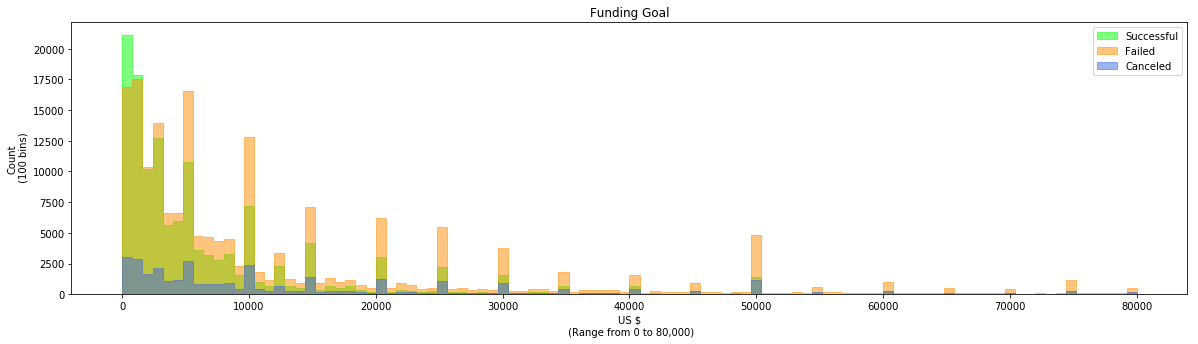

In [17]:
## FUNDING GOAL

goals = [ks_succ['Goal'], ks_fail['Goal'], ks_canc['Goal']]
goals_labels = ['Successful','Failed','Canceled']

plt.figure(figsize=(20,5))
plt.title('Funding Goal')
range1 = 0
range2 = 80000
bins_  = 100

i=0
for set in goals[0:3]:
    set.plot(kind="hist", fill=True, bins=bins_, range=(range1,range2), alpha=0.5, color=colors[i], histtype='step', label=goals_labels[i])
    i+=1

plt.xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
plt.ylabel('Count\n ({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

Next, we have a look at the pledged amount.

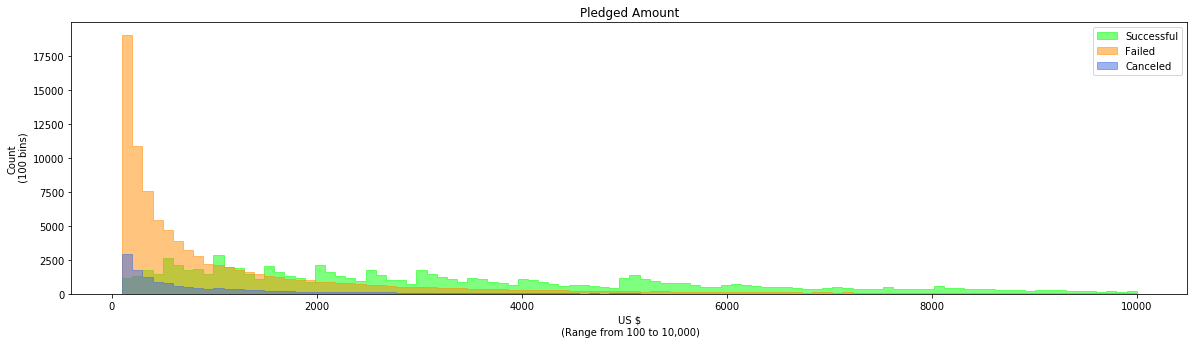

In [18]:
## PLEDGED AMOUNT

goals = [ks_succ['Pledged'], ks_fail['Pledged'], ks_canc['Pledged']]
goals_labels = ['Successful','Failed','Canceled']

plt.figure(figsize=(20,5))
plt.title('Pledged Amount')
range1 = 100
range2 = 10000
bins_  = 100

i=0
for set in goals[0:3]:
    set.plot(kind="hist", fill=True, bins=bins_, range=(range1,range2), alpha=0.5, color=colors[i], histtype='step', label=goals_labels[i])
    i+=1

plt.xlabel('US $\n (Range from {:,d} to {:,d})'.format(range1, range2))
plt.ylabel('Count\n ({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

Now, the backers, the people who make a project come to life. Notice that the range had to be adjusted to not show backers < 12 so we are able to make out more of a structure, especially considering the canceled projects.

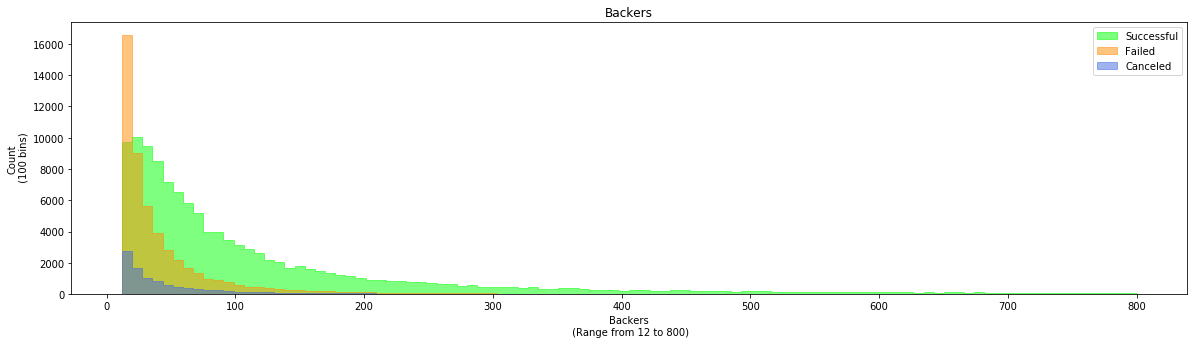

In [19]:
## BACKERS

goals = [ks_succ['Backers'], ks_fail['Backers'], ks_canc['Backers']]
goals_labels = ['Successful','Failed','Canceled']

plt.figure(figsize=(20,5))
plt.title('Backers')
range1 = 12
range2 = 800
bins_  = 100

i=0
for set in goals[0:3]:
    set.plot(kind="hist", fill=True, bins=bins_, range=(range1,range2), alpha=0.5, color=colors[i], histtype='step', label=goals_labels[i])
    i+=1

plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(range1, range2))
plt.ylabel('Count\n ({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

The success quotient. If we compare this to the same graph from the working set, we can easily see that the left part is mainly failed projects and the right is almost exclusively successful projects. But also the canceled projects are for the most part on the left.

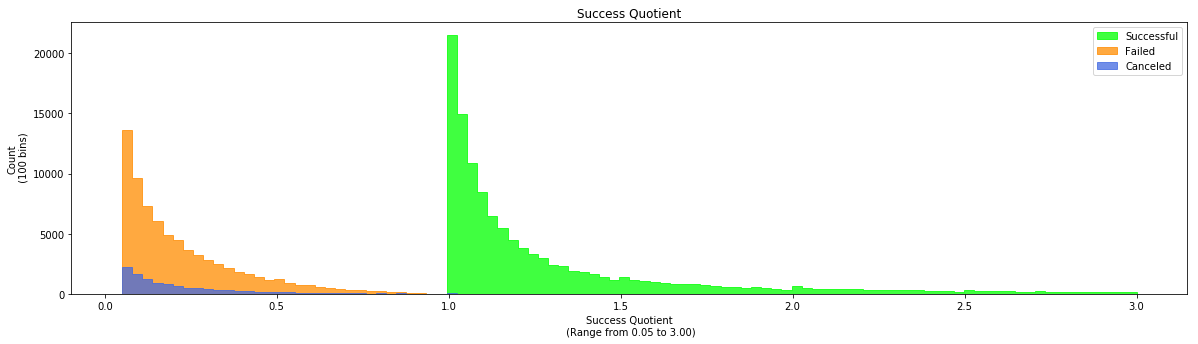

In [20]:
## SUCCESS QUOTIENT

goals = [ks_succ['SuccessQ'], ks_fail['SuccessQ'], ks_canc['SuccessQ']]
goals_labels = ['Successful','Failed','Canceled']

plt.figure(figsize=(20,5))
plt.title('Success Quotient')
range1 = 0.05
range2 = 3
bins_  = 100

i=0
for set in goals[0:3]:
    set.plot(kind="hist", fill=True, bins=bins_, range=(range1,range2), alpha=0.75, color=colors[i], histtype='step', label=goals_labels[i])
    i+=1

plt.xlabel('Success Quotient\n (Range from {:,.2f} to {:,.2f})'.format(range1, range2))
plt.ylabel('Count\n ({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

And finally, the pledged amount per backer.

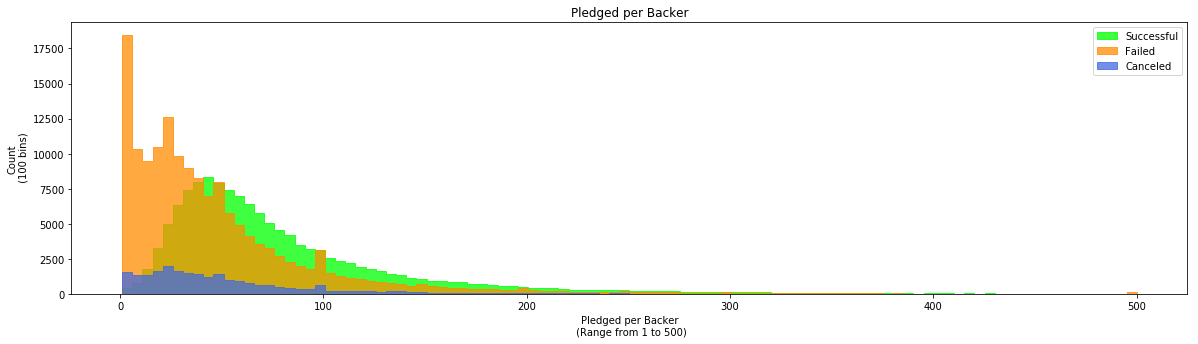

In [21]:
## PLEDGED PER BACKER

goals = [ks_succ['PerBacker'], ks_fail['PerBacker'], ks_canc['PerBacker']]
labels_ = ['Successful','Failed','Canceled']

plt.figure(figsize=(20,5))
plt.title('Pledged per Backer')
range1 = 1
range2 = 500
bins_  = 100

i=0
for set in goals[0:3]:
    set.plot(kind="hist", fill=True, bins=bins_, range=(range1,range2), alpha=0.75, color=colors[i], histtype='step', label=labels_[i])
    i+=1

plt.xlabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(range1, range2))
plt.ylabel('Count\n ({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

## Scatter Plots

We will try to find a model for the successful projects as these are the ones we primarily care about. Of those, especially the ones with a high success quotient. For this, the first step is to look at various scatter plots to figure out how the data points plot against each other and if there are attributes that stand out.

None of our datasets are normally distributed, which is apparent when one looks at the plots above. For completeness' sake and to show how little normal they are, here are the D'Agostino-Pearson tests:

In [22]:
# D'Agostino-Pearon tests

k2, p = stats.normaltest(ks_ws['Goal'])
print('Working Set (Funding Goal): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_ws['Pledged'])
print('Working Set (Pledged Amount): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_ws['Backers'])
print('Working Set (Backers): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_ws['SuccessQ'])
print('Working Set (Success Quotient): {:.14f}\n'.format(p))

k2, p = stats.normaltest(ks_succ['Goal'])
print('Successful Projects (Funding Goal): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_succ['Pledged'])
print('Successful Projects (Pledged Amount): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_succ['Backers'])
print('Successful Projects (Backers): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_succ['SuccessQ'])
print('Successful Projects (Success Quotient): {:.14f}\n'.format(p))

k2, p = stats.normaltest(ks_fail['Goal'])
print('Failed Projects (Funding Goal): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_fail['Pledged'])
print('Failed Projects (Pledged Amount): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_fail['Backers'])
print('Failed Projects (Backers): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_fail['SuccessQ'])
print('Failed Projects (Success Quotient): {:.14f}\n'.format(p))

k2, p = stats.normaltest(ks_canc['Goal'])
print('Canceled Projects (Funding Goal): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_canc['Pledged'])
print('Canceled Projects (Pledged Amount): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_canc['Backers'])
print('Canceled Projects (Backers): {:.14f}'.format(p))
k2, p = stats.normaltest(ks_canc['SuccessQ'])
print('Canceled Projects (Success Quotient): {:.14f}'.format(p))

Working Set (Funding Goal): 0.00000000000000
Working Set (Pledged Amount): 0.00000000000000
Working Set (Backers): 0.00000000000000
Working Set (Success Quotient): 0.00000000000000

Successful Projects (Funding Goal): 0.00000000000000
Successful Projects (Pledged Amount): 0.00000000000000
Successful Projects (Backers): 0.00000000000000
Successful Projects (Success Quotient): 0.00000000000000

Failed Projects (Funding Goal): 0.00000000000000
Failed Projects (Pledged Amount): 0.00000000000000
Failed Projects (Backers): 0.00000000000000
Failed Projects (Success Quotient): 0.00000000000000

Canceled Projects (Funding Goal): 0.00000000000000
Canceled Projects (Pledged Amount): 0.00000000000000
Canceled Projects (Backers): 0.00000000000000
Canceled Projects (Success Quotient): 0.00000000000000


Next, we look at some scatter plots to try to figure out an easy way to distinguish the successful from the failed projects and also to get a feel and a visual for the spread of the data.

The **Goal vs Pledged** scatter plot shows a few interesting things. The diagonal not being one of them as this is so by definition. We can see that there's a increase in successful projects in the lower left corner. So many campaigns were successful because they asked for what they needed instead of some ludicrous round amount. Then, we can again see that the failed and canceled projects never truly got off the ground. There's only a minority that barely failed to make the funding goal. This is apparent by the white space right under the diagonal. Also interesting are the human lines at the 5k marks, especially the pillar at the 50k mark. And the odd canceled projects that are sprinkled throughout the space above the diagonal. Especially the ones in the top left corner. Some of them made 60,000 while only asking for 5,000 and then were canceled. Case studies would be in order to figure out why this is so.

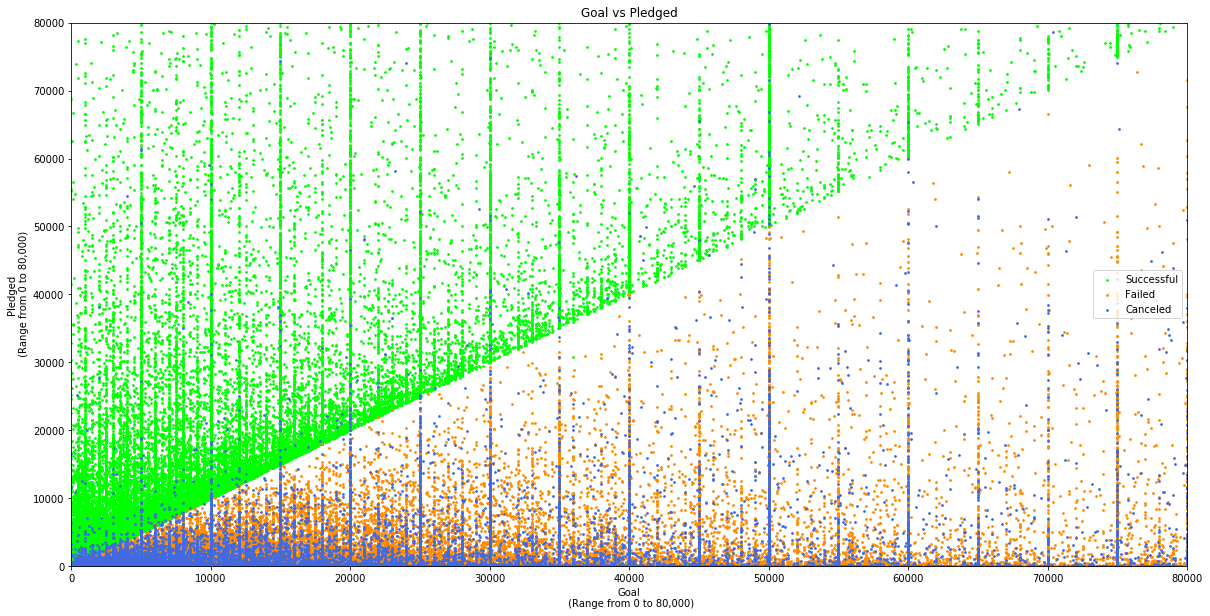

In [23]:
# Goal vs. Pledged
plt.figure(figsize=(20,10))
plt.title('Goal vs Pledged')
x1 = 0
x2 = 80000
y1 = 0
y2 = 80000
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Goal'], y=ks_succ['Pledged'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['Goal'], y=ks_fail['Pledged'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Goal'], y=ks_canc['Pledged'], c=colors[2], s=3, label='Canceled')

plt.xlabel('Goal\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

The next scatter plot, **Backers vs Success Quotient**, is a very large scale graph, showing the spread up to a success quotient of 30 and up to 3,000 backers. While the bulk of projects is in the lower left, they are surprisingly evenly spaced out after that.

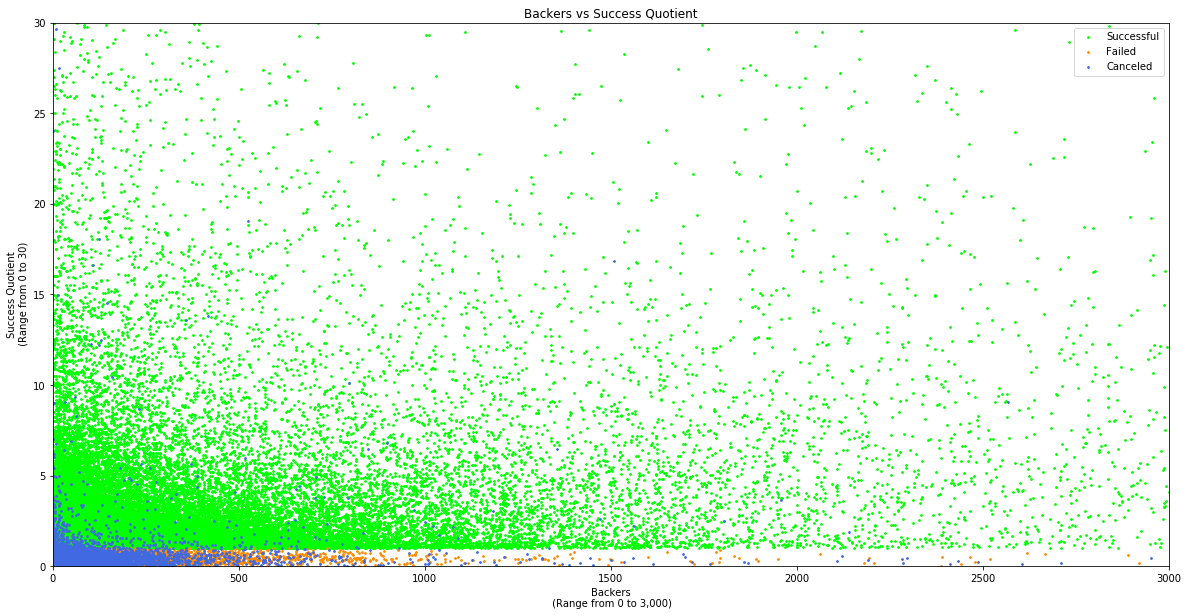

In [24]:
# Backers vs. Success Quotient

plt.figure(figsize=(20,10))
plt.title('Backers vs Success Quotient')
x1 = 0
x2 = 3000
y1 = 0
y2 = 30
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Backers'], y=ks_succ['SuccessQ'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['Backers'], y=ks_fail['SuccessQ'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Backers'], y=ks_canc['SuccessQ'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

The next scatter plot, **Backers vs Pledged per Backer**, looks very promising to find a model. While the canceled projects are very interesting, we cannot judge from our data why they were canceled as there are many that exceeded their funding goal by much, some cases up to 30 times. So we will focus on successful and failed projects for now to find a criterion that distinguishes the two.

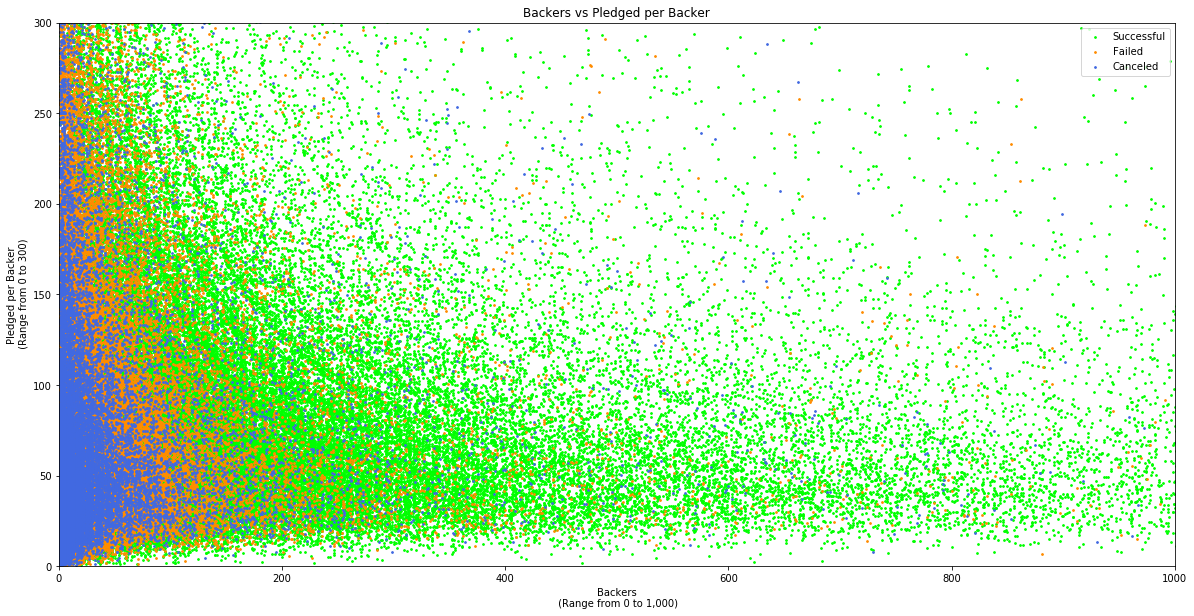

In [25]:
# Backers vs. Pledged per Backer

plt.figure(figsize=(20,10))
plt.title('Backers vs Pledged per Backer')
x1 = 0
x2 = 1000
y1 = 0
y2 = 300
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Backers'], y=ks_succ['PerBacker'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['Backers'], y=ks_fail['PerBacker'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Backers'], y=ks_canc['PerBacker'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

Our next scatter plot is the same, but without the canceled projects.

Without them disturbing our picture like Blueberries in a field, we can see more details. Especially in the space between 100 and 300 backers, we can see several interesting parallel hyperbola curves. And in the range between around \$20 to $100 we can see a spread that looks like a spiral arm of a galaxy seen from the side.

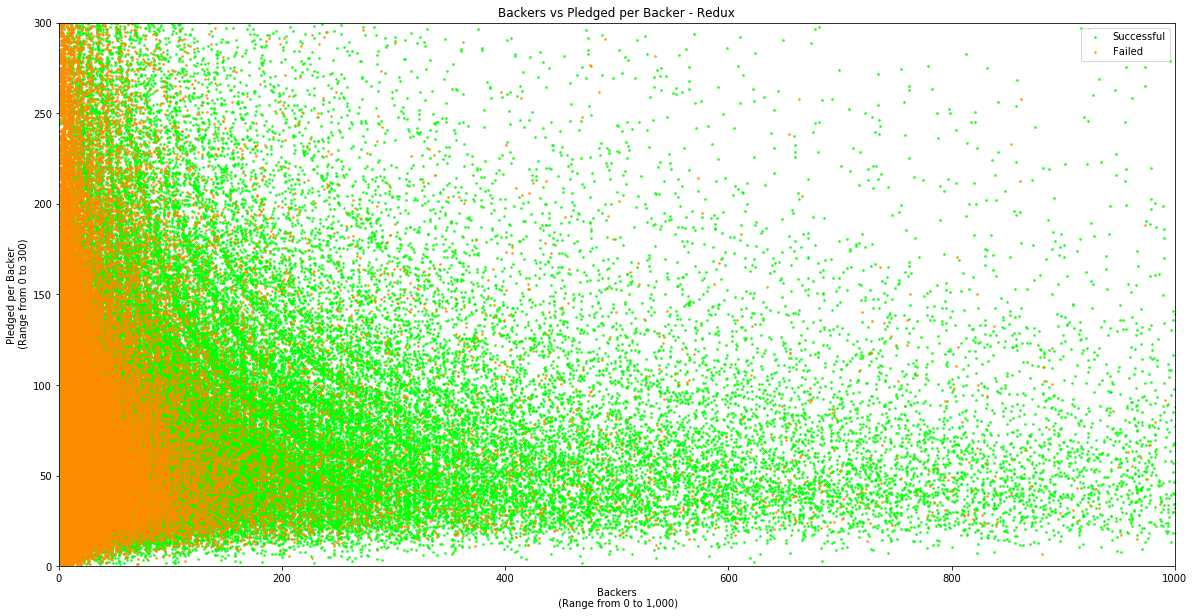

In [26]:
# Backers vs. Pledged per Backer Redux

plt.figure(figsize=(20,10))
plt.title('Backers vs Pledged per Backer - Redux')
x1 = 0
x2 = 1000
y1 = 0
y2 = 300
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Backers'], y=ks_succ['PerBacker'], c=colors[0], s=3, alpha=0.75, label='Successful')
plt.scatter(x=ks_fail['Backers'], y=ks_fail['PerBacker'], c=colors[1], s=3, alpha=0.75, label='Failed')
plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

We try to zoom in a bit more and remove the failed projects to display the parallel curves a little better.

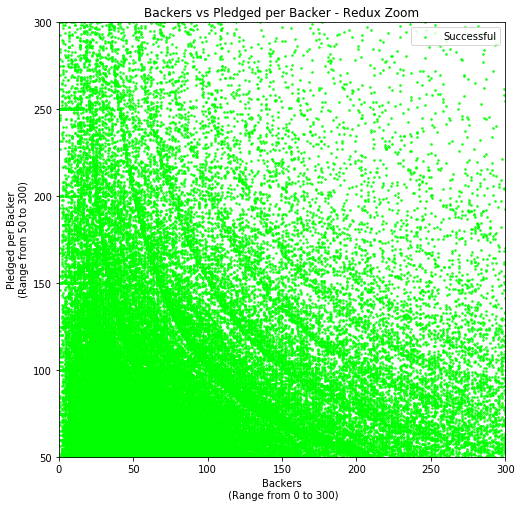

In [27]:
# Backers vs. Pledged per Backer Redux Zoom

plt.figure(figsize=(8,8))
plt.title('Backers vs Pledged per Backer - Redux Zoom')
x1 = 0
x2 = 300
y1 = 50
y2 = 300
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Backers'], y=ks_succ['PerBacker'], c=colors[0], s=3, alpha=0.75, label='Successful')
#plt.scatter(x=ks_fail['Backers'], y=ks_fail['PerBacker'], c=colors[1], s=3, alpha=0.75, label='Failed')
plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

In the **Pledged per Backer vs. Success Quotient** scatter plot we can see that the most successful projects, or those that exceeded their funding goal multiple times, were ones that had a relatively low average pledge per backer.

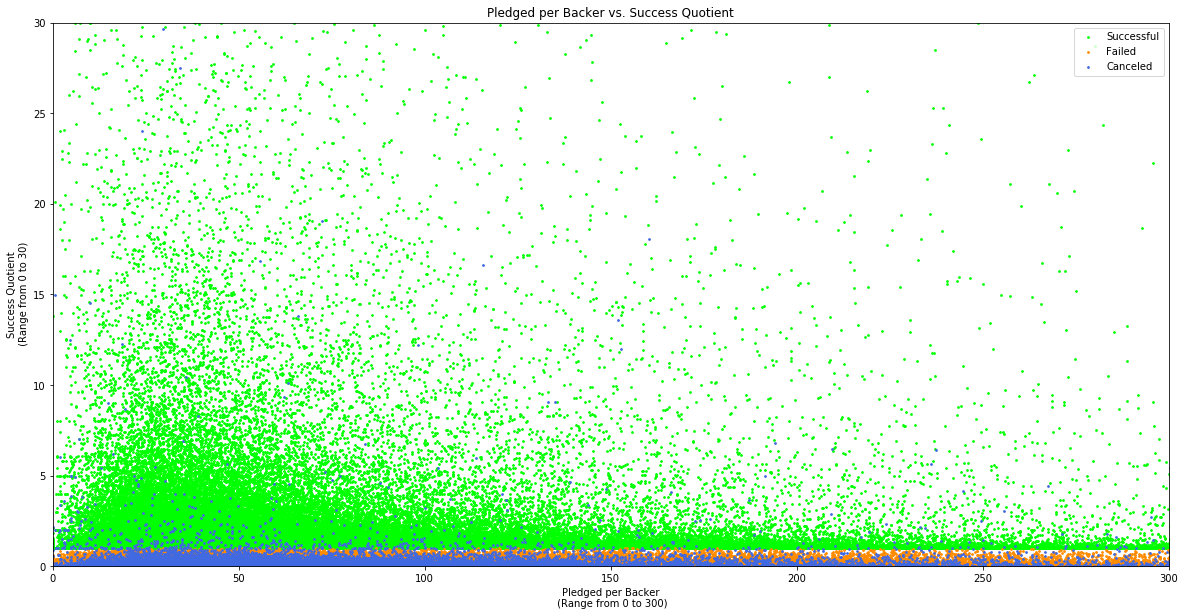

In [28]:
# Pledged per Backer vs. Success Quotient

plt.figure(figsize=(20,10))
plt.title('Pledged per Backer vs. Success Quotient')
x1 = 0
x2 = 300
y1 = 0
y2 = 30
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['PerBacker'], y=ks_succ['SuccessQ'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['PerBacker'], y=ks_fail['SuccessQ'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['PerBacker'], y=ks_canc['SuccessQ'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

The next **Goal vs Pledged per Backer** is one of the most fascinating scatter plots. This graph is very interesting because you can almost not make out any successful projects. What you can see however are vertical and horizontal «human lines.» Fascinatingly, the horizontal lines are almost exclusively failed or canceled projects.
Notice there is almost a straight blue line at the 50k mark all the way up to $500 per backer.

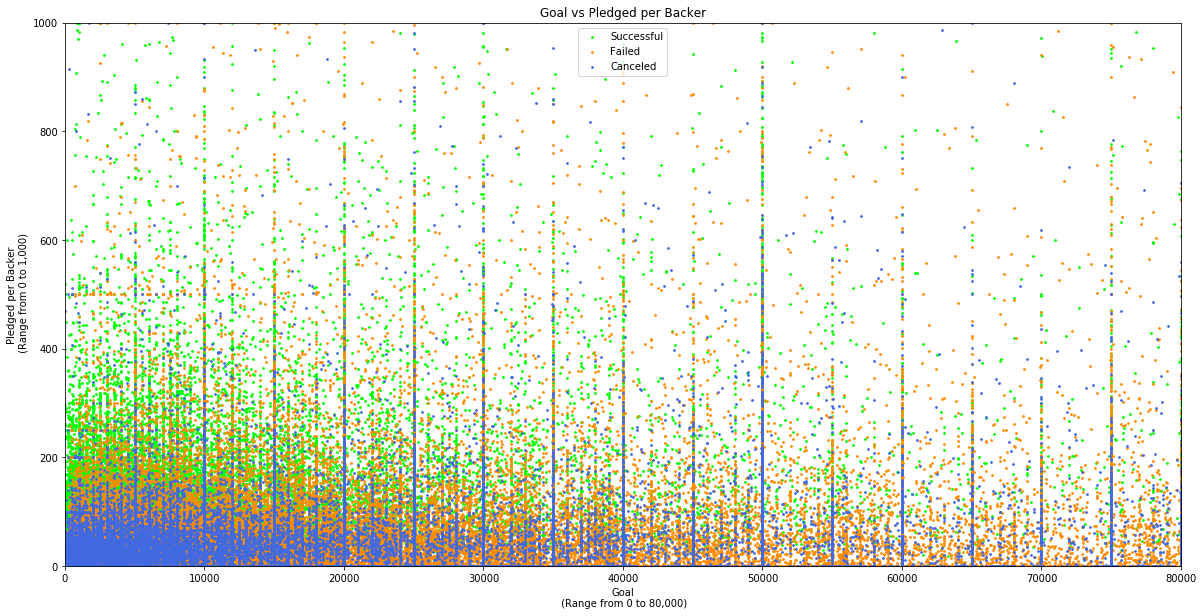

In [29]:
# Goal vs. Pledged per Backer

plt.figure(figsize=(20,10))
plt.title('Goal vs Pledged per Backer')
x1 = 0
x2 = 80000
y1 = 0
y2 = 1000
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Goal'], y=ks_succ['PerBacker'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['Goal'], y=ks_fail['PerBacker'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Goal'], y=ks_canc['PerBacker'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Goal\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

For once, it is the successful projects we remove from the graph.

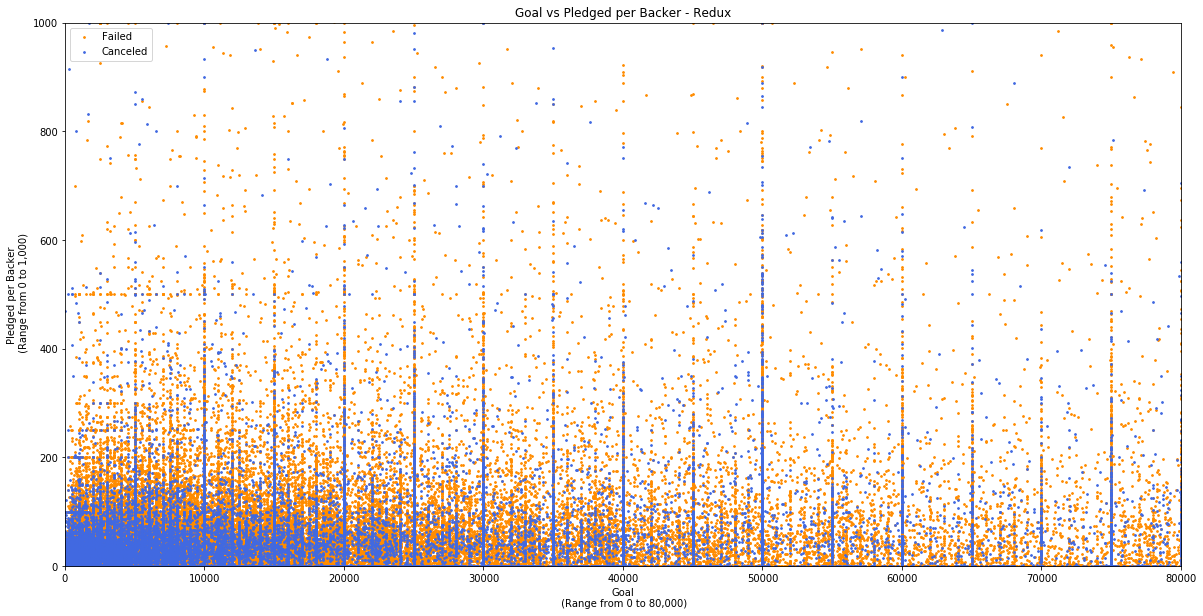

In [30]:
# Goal vs. Pledged per Backer - Redux

plt.figure(figsize=(20,10))
plt.title('Goal vs Pledged per Backer - Redux')
x1 = 0
x2 = 80000
y1 = 0
y2 = 1000
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_fail['Goal'], y=ks_fail['PerBacker'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Goal'], y=ks_canc['PerBacker'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Goal\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

The **Goal vs. Backers** looks similar, but without the horizontal human lines.

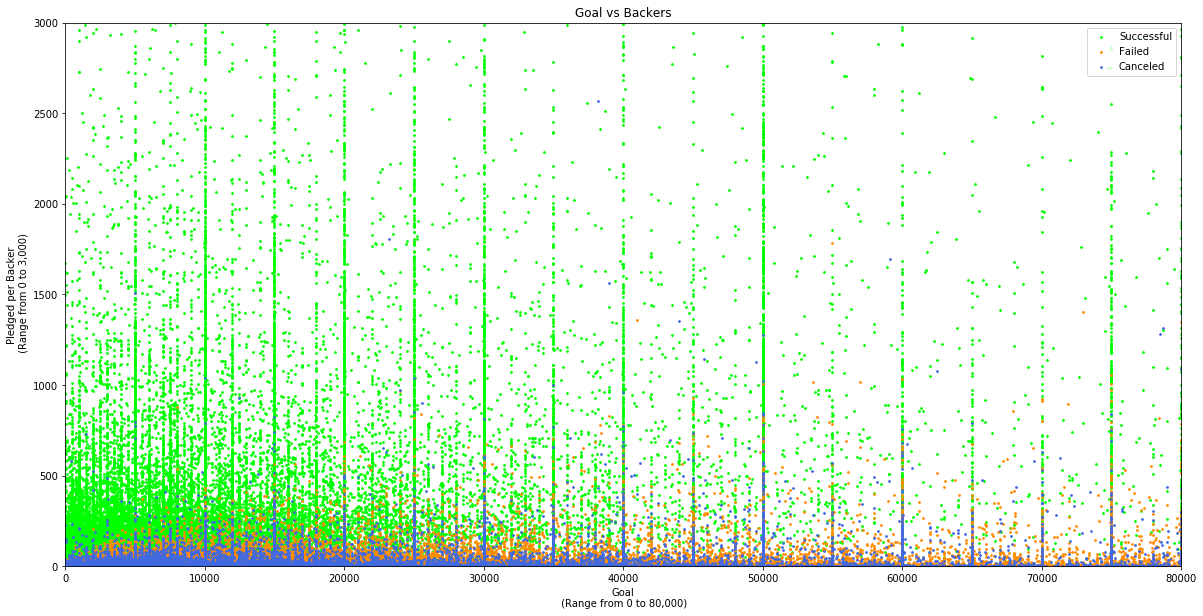

In [31]:
# Goal vs. Backers

plt.figure(figsize=(20,10))
plt.title('Goal vs Backers')
x1 = 0
x2 = 80000
y1 = 0
y2 = 3000
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Goal'], y=ks_succ['Backers'], c=colors[0], s=3, label='Successful')
plt.scatter(x=ks_fail['Goal'], y=ks_fail['Backers'], c=colors[1], s=3, label='Failed')
plt.scatter(x=ks_canc['Goal'], y=ks_canc['Backers'], c=colors[2], s=3, label='Canceled')
plt.xlabel('Goal\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

Let's take the set of successful projects and scatter plot the various attributes against the success quotient. Unfortunately, not a clear picture emerges. As for the backers, they seem to be pretty evenly spread out. The goals are bottom-left heavy. As well as the pledge per backer scatter plot.

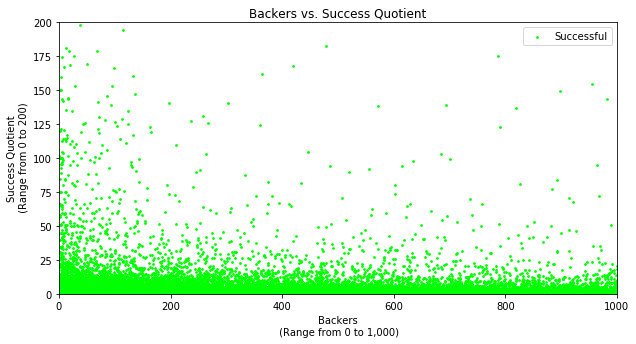

In [32]:
# Backers vs. Success Quotient

plt.figure(figsize=(10,5))
plt.title('Backers vs. Success Quotient')
x1 = 0
x2 = 1000
y1 = 0
y2 = 200
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Backers'], y=ks_succ['SuccessQ'], c=colors[0], s=3, label='Successful')

plt.xlabel('Backers\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

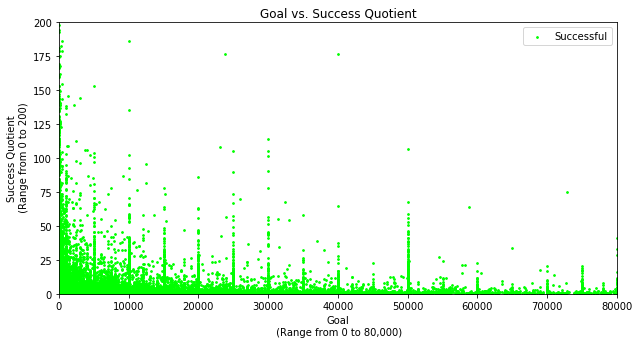

In [33]:
# Goal vs. Success Quotient

plt.figure(figsize=(10,5))
plt.title('Goal vs. Success Quotient')
x1 = 0
x2 = 80000
y1 = 0
y2 = 200
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['Goal'], y=ks_succ['SuccessQ'], c=colors[0], s=3, label='Successful')

plt.xlabel('Goal\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

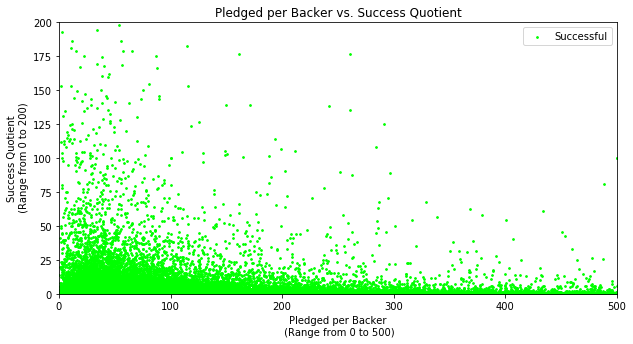

In [34]:
# Pledged per Backer vs. Success Quotient

plt.figure(figsize=(10,5))
plt.title('Pledged per Backer vs. Success Quotient')
x1 = 0
x2 = 500
y1 = 0
y2 = 200
plt.axis([x1, x2, y1, y2])

plt.scatter(x=ks_succ['PerBacker'], y=ks_succ['SuccessQ'], c=colors[0], s=3, label='Successful')

plt.xlabel('Pledged per Backer\n (Range from {:,d} to {:,d})'.format(x1, x2))
plt.ylabel('Success Quotient\n (Range from {:,d} to {:,d})'.format(y1, y2))
plt.legend()
plt.show()

## Finding a Function

As a somewhat simpler exercise, let's look at the graph of the backers of failed projects, even though we don't directly care about them.

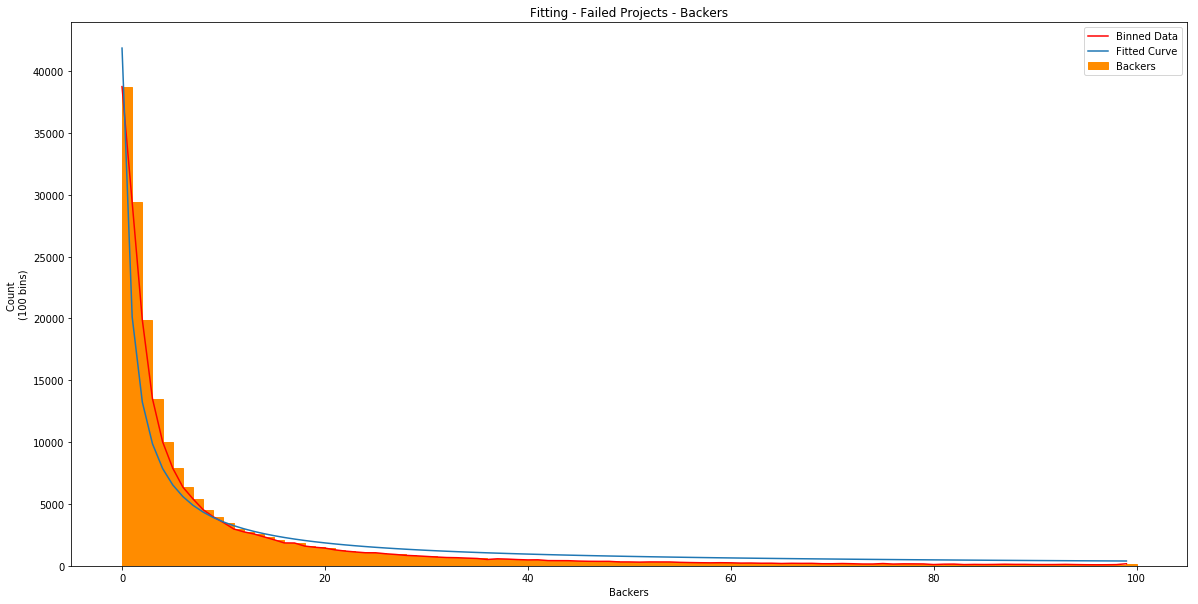

In [35]:
## FAILED PROJECTS

# Backers

# First, let's create a binned set for fitting
# For this, we will filter the dataframe ks_fail using the .query() method to only include projects where there are at most 100 backers
# This is necessary for technical reasons in relation to binning (without getting into details)
# This will have no impact on the fitted curve as these are far out values and we retain 97.2% of the data (see below)

# Binning will be done with the .cut() method followed by the .value_counts() method:
# - include_lowest=True means that 0 is included, which is very important in the case of failed projects
# - right=False makes the intervals right-open [) instead of the default left-open (], which is mainly important for 0
# - sort_index() is not necessary in this case as the data are descending and .value_counts() automatically sorts them by value, not by index

bins_ = 100
ks_fail_backers_redux = ks_fail.query('Backers<=100')
ks_fail_backers_bin = pd.cut(ks_fail_backers_redux['Backers'], bins=bins_, include_lowest=True, right=False).value_counts().sort_index()

# Seeing that we retain 97.2% of the data using the .shape[0] method if needed:
#print('{:.1f}%'.format(100*ks_fail_backers_redux.shape[0]/ks_fail.shape[0]))

# Print the binned data if needed
#print(ks_fail_backers_bin)

# list(range(x)) is a simple way to create an evenly spaced array from 0 to x
xdata = list(range(bins_))
ydata = ks_fail_backers_bin

plt.figure(figsize=(20,10))

# Plot the graph of the binned data
plt.plot(xdata, ydata, color='red', label='Binned Data')

# Define the function for which we search parameters
# curve_fit has known problems when the numbers are high and returns absolutely ridiculous results, so we have to help by manually setting the starting point
# Unfortunately, while it would be preferrable to have (a * ks_fail_backers_bin[0]) / (x + b), curve_fit cannot handle this at all
def func(a, x):
    return ks_fail_backers_bin[0]/(x + a)

# Here, the magic happens. Curve_fit optimizes the parameters of func()
# - popt: Optimal values for the parameters so that the sum of the squared residuals is minimized
# - pcov: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
popt, pcov = curve_fit(func, xdata, ydata)

# Print popt if needed
#print(popt)

#Plot the graph of the fitted curve
plt.plot(xdata, func(popt[0], xdata), label='Fitted Curve')

# Plot the real data
ks_fail_backers_plt = ks_fail['Backers'].plot(kind="hist", bins=bins_, range=(0,100), color=colors[1], fill=True, histtype='step')

plt.title('Fitting - Failed Projects - Backers')
plt.xlabel('Backers')
plt.ylabel('Count \n({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

We can't be too happy with this graph as we had to imput too much prior information into the curve_fit method. As it seems, curve_fit does have its limitations and we will have to find an alternative method of fitting our data to a model function. When we try to fit our data to the [Rayleigh distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution).

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 400.

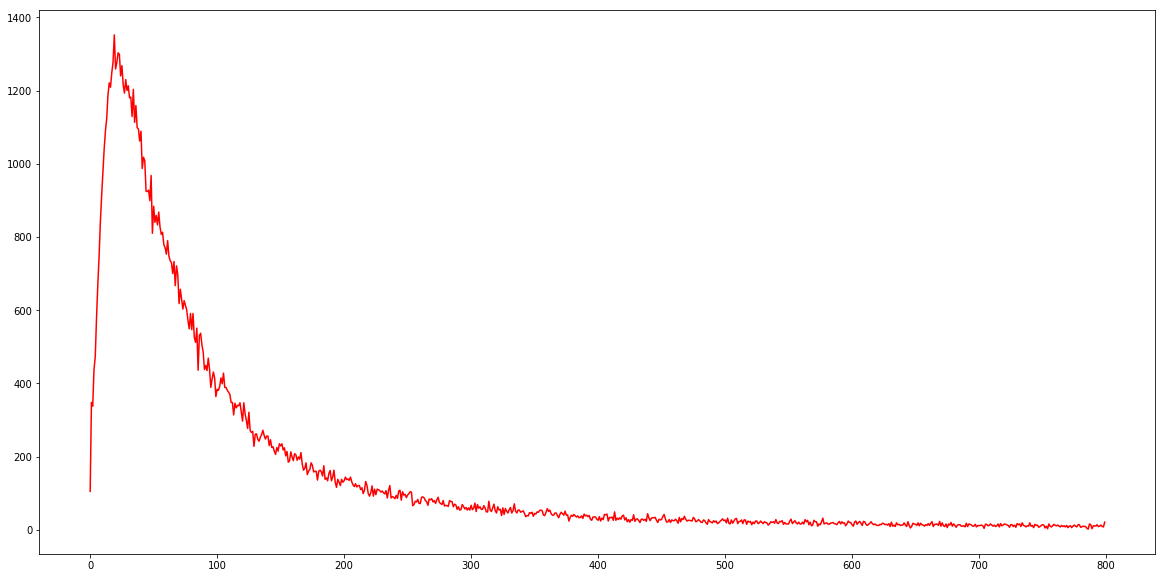

In [36]:
## SUCCESSFUL PROJECTS

# Backers

# First, let's create a binned set for fitting
# For this, we will filter the dataframe ks_succ using the .query() method to only include projects where there are at most 800 backers
# This is necessary for technical reasons in relation to binning (without getting into details)
# This will have no impact on the fitted curve as these are far out values and we retain 94.5% of the data (see below)

# Binning will be done with the .cut() method followed by the .value_counts() method:
# - include_lowest=True means that 0 is included
# - right=False makes the intervals right-open [) instead of the default left-open (], which is mainly important for 0

bins_ = 800
ks_succ_backers_redux = ks_succ.query('Backers<=800')
ks_succ_backers_bin = pd.cut(ks_succ_backers_redux['Backers'], bins=bins_, include_lowest=True, right=False).value_counts().sort_index()

# Seeing that we retain 94.5% of the data using the .shape[0] method if needed:
#print('{:.1f}%'.format(100*ks_succ_backers_redux.shape[0]/ks_succ.shape[0]))

# Print the binned data if needed
#pd.set_option('display.max_rows',300)
#print(ks_succ_backers_bin.head(300))
#pd.set_option('display.max_rows',20)

# list(range(x)) is a simple way to create an evenly spaced array from 0 to x
xdata = list(range(bins_))
ydata = ks_succ_backers_bin

plt.figure(figsize=(20,10))

# Plot the graph of the binned data
plt.plot(xdata, ydata, color='red', label='Binned Data')

# Define the function for which we search parameters
# curve_fit has known problems when the numbers are high and returns absolutely ridiculous results
# We try (and fail) to fit it to the Rayleigh distribution (https://en.wikipedia.org/wiki/Rayleigh_distribution)
def func(a, x):
    return x / a**2 * np.exp(-x**2 / (2 * a**2))

# Here, the magic happens. Curve_fit optimizes the parameters of func()
# - popt: Optimal values for the parameters so that the sum of the squared residuals is minimized
# - pcov: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
popt, pcov = curve_fit(func, xdata, ydata)

# Print popt if needed
#print(popt)

#Plot the graph of the fitted curve
#plt.plot(xdata, func(popt[0], xdata), label='Fitted Curve')

# Plot the real data
ks_succ_backers_plt = ks_succ['Backers'].plot(kind="hist", bins=bins_, range=(0,800), color=colors[1], fill=True, histtype='step')

plt.title('Fitting - Successful Projects - Backers')
plt.xlabel('Backers')
plt.ylabel('Count \n({:,d} bins)'.format(bins_))
plt.legend()
plt.show()

## Conclusion

Sadly, we were not able to find a suitable model. But we will not give up! With such a large and diverse dataset, getting to know the data takes a lot of time and the data probably needs to be split up into homogenous chunks to find good approximation functions.

This data set will serve us well in the months and modules to come and it will be interesting to see how much insight we can achieve by using advanced data science concepts on it. So in the spirit of this famous quote, we shall march on:

"We choose to go to the Moon in this decade and do the other things, not because they are easy, but because they are hard; because that goal will serve to organize and measure the best of our energies and skills, because that challenge is one that we are willing to accept." - John F. Kennedy